# 2024-01-30 30 - dev gridsearch constant.ipynb
Visualize what the regression lines would be (as parameters for linear)

## Parameters

## Libraries and setup

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Latex

In [5]:
from utils import wandb_utils

## Data Download

In [7]:
# real_df = wandb_utils.get_experiment_data("Autoformer","alelab",experiment_tags=[],query_dict={"$and": [
#                         {"tags": {"$in": ["e16_finaljan_allerm_replicated","e18_icml_constant_constrained_loose","e17_finaljan_constant_constrained_replicated"]}},
#                         {"state": "finished"},
#                         {"config.seed": 2021}
#         ]})
# Used cached data because wandb is slow.
real_df=pd.read_pickle("run_data_cache_icml_constant_constrained_noresilience.pkl")

In [16]:
real_df.query("data_path=='weather.csv' and model=='Autoformer' and pred_len==720").sweep_id.unique().tolist()+\
real_df.query("data_path=='weather.csv' and model=='Reformer' and pred_len==96").sweep_id.unique().tolist()+\
real_df.query("data_path=='weather.csv' and model=='Reformer' and pred_len==192").sweep_id.unique().tolist()

['4ajhtt0w',
 'ma8c93me',
 'xuxe4veo',
 'mjaurn4n',
 'ma8c93me',
 'la6vjyfi',
 '8nsm12x7',
 'ma8c93me']

In [ ]:
['4ajhtt0w',
 'ma8c93me',
 'xuxe4veo',
 'mjaurn4n',
 'ma8c93me',
 'la6vjyfi',
 '8nsm12x7',
 'ma8c93me']
https://wandb.ai/alelab/Autoformer/sweeps/

In [8]:
#deleteme find missing runs 
real_df.groupby(['data_path','model','pred_len'])['run_id'].nunique().reset_index().sort_values(by='run_id')

data_path        model  pred_len  run_id
35        weather.csv   Autoformer       720       4
40        weather.csv     Reformer        96       6
9     electricity.csv     Reformer       192       6
0     electricity.csv   Autoformer        96       7
26  exchange_rate.csv     Reformer       336       7
27  exchange_rate.csv     Reformer       720       7
28  exchange_rate.csv  Transformer        96       7
29  exchange_rate.csv  Transformer       192       7
30  exchange_rate.csv  Transformer       336       7
31  exchange_rate.csv  Transformer       720       7
32        weather.csv   Autoformer        96       7
33        weather.csv   Autoformer       192       7
34        weather.csv   Autoformer       336       7
36        weather.csv     Informer        96       7
37        weather.csv     Informer       192       7
38        weather.csv     Informer       336       7
39        weather.csv     Informer       720       7
41        weather.csv     Reformer       192       7
42        weather.csv     Reformer       336       7
43        weather.csv     Reformer       720       7
44        weather.csv  Transformer        96       7
45        weather.csv  Transformer       192       7
25  exchange_rate.csv     Reformer       192       7
24  exchange_rate.csv     Reformer        96       7
23  exchange_rate.csv     Informer       720       7
22  exchange_rate.csv     Informer       336       7
1     electricity.csv   Autoformer       192       7
2     electricity.csv   Autoformer       336       7
3     electricity.csv   Autoformer       720       7
4     electricity.csv     Informer        96       7
5     electricity.csv     Informer       192       7
6     electricity.csv     Informer       336       7
7     electricity.csv     Informer       720       7
8     electricity.csv     Reformer        96       7
10    electricity.csv     Reformer       336       7
46        weather.csv  Transformer       336       7
11    electricity.csv     Reformer       720       7
13    electricity.csv  Transformer       192       7
14    electricity.csv  Transformer       336       7
15    electricity.csv  Transformer       720       7
16  exchange_rate.csv   Autoformer        96       7
17  exchange_rate.csv   Autoformer       192       7
18  exchange_rate.csv   Autoformer       336       7
19  exchange_rate.csv   Autoformer       720       7
20  exchange_rate.csv     Informer        96       7
21  exchange_rate.csv     Informer       192       7
12    electricity.csv  Transformer        96       7
47        weather.csv  Transformer       720       7

In [7]:
df = real_df.copy()

In [8]:
df_erm = df.query("constraint_type == 'erm'").copy()

In [11]:
runs_per_groupset=df_erm.groupby(['data_path','model','pred_len','seed'])['run_id'].nunique().reset_index()
runs_per_groupset

data_path        model  pred_len  seed  run_id
0     electricity.csv   Autoformer        96  2021       1
1     electricity.csv   Autoformer       192  2021       1
2     electricity.csv   Autoformer       336  2021       1
3     electricity.csv   Autoformer       720  2021       1
4     electricity.csv     Informer        96  2021       1
5     electricity.csv     Informer       192  2021       1
6     electricity.csv     Informer       336  2021       1
7     electricity.csv     Informer       720  2021       1
8     electricity.csv     Reformer        96  2021       1
9     electricity.csv     Reformer       192  2021       1
10    electricity.csv     Reformer       336  2021       1
11    electricity.csv     Reformer       720  2021       1
12    electricity.csv  Transformer        96  2021       1
13    electricity.csv  Transformer       192  2021       1
14    electricity.csv  Transformer       336  2021       1
15    electricity.csv  Transformer       720  2021       1
16  exchange_rate.csv   Autoformer        96  2021       1
17  exchange_rate.csv   Autoformer       192  2021       1
18  exchange_rate.csv   Autoformer       336  2021       1
19  exchange_rate.csv   Autoformer       720  2021       1
20  exchange_rate.csv     Informer        96  2021       1
21  exchange_rate.csv     Informer       192  2021       1
22  exchange_rate.csv     Informer       336  2021       1
23  exchange_rate.csv     Informer       720  2021       1
24  exchange_rate.csv     Reformer        96  2021       1
25  exchange_rate.csv     Reformer       192  2021       1
26  exchange_rate.csv     Reformer       336  2021       1
27  exchange_rate.csv     Reformer       720  2021       1
28  exchange_rate.csv  Transformer        96  2021       1
29  exchange_rate.csv  Transformer       192  2021       1
30  exchange_rate.csv  Transformer       336  2021       1
31  exchange_rate.csv  Transformer       720  2021       1
32        weather.csv   Autoformer        96  2021       1
33        weather.csv   Autoformer       192  2021       1
34        weather.csv   Autoformer       336  2021       1
35        weather.csv   Autoformer       720  2021       1
36        weather.csv     Informer        96  2021       1
37        weather.csv     Informer       192  2021       1
38        weather.csv     Informer       336  2021       1
39        weather.csv     Informer       720  2021       1
40        weather.csv     Reformer        96  2021       1
41        weather.csv     Reformer       192  2021       1
42        weather.csv     Reformer       336  2021       1
43        weather.csv     Reformer       720  2021       1
44        weather.csv  Transformer        96  2021       1
45        weather.csv  Transformer       192  2021       1
46        weather.csv  Transformer       336  2021       1
47        weather.csv  Transformer       720  2021       1

## Data processing
This section contains processing specific to this experiment set. If you clone this notebook. Remove or refactor this section.

In [16]:
#df_constrained = df.query('type=="Constrained"').copy()
#df_constrained,best_runs = gridsearch(df_constrained,objective_col='mse', gridsearch_keys=['model', 'pred_len', 'data_path'],reference_cols=['run_id'],split='val')
df_erm = df.query('type=="ERM"').copy()
df_to_plot = df_erm

In [18]:
# Calculate mean and std for mse and constraint_violation. Rename them mean_{metric} and std_{metric

summary_metrics_per_run = df_to_plot.groupby([
    "run_id",
    "Algorithm", #Harmless carryover col for legacy purposes (verified the counts are the same)
    "model",'type',"constraint_level","pred_len","data_path",
    "split"
    ])['mse','constraint_violation','infeasible_rate','run_id'].aggregate(
        mse=('mse','mean'),
        #std_mse=('mse','std'),
        mcv=('constraint_violation','mean'),
        #std_mcv=('constraint_violation','std'),
        mean_infeasible_rate=('infeasible_rate','mean'),
        #std_infeasible_rate=('infeasible_rate','std'),
        run_count=('run_id','nunique')
        ).reset_index().round(5)
summary_metrics = summary_metrics_per_run.groupby([
    "Algorithm", #Harmless carryover col for legacy purposes (verified the counts are the same)
    "model",'type',"constraint_level","pred_len","data_path",
    "split"]).aggregate(
        mse=('mse','mean'),
        std_mse=('mse','std'),
        mcv=('mcv','mean'),
        std_mcv=('mcv','std'),
        mean_infeasible_rate=('mean_infeasible_rate','mean'),
        std_infeasible_rate=('mean_infeasible_rate','std'),
        run_count=('run_count','mean')
    ).reset_index()
display(summary_metrics_per_run.shape)
display(summary_metrics.shape)
summary_metrics.head()

/home/jporras/miniconda3/envs/autoformer/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


(144, 12)

(144, 14)

Algorithm       model type  constraint_level  \
0  AllModels_electricity.csv Autoformer  Autoformer  ERM              -1.0   
1  AllModels_electricity.csv Autoformer  Autoformer  ERM              -1.0   
2  AllModels_electricity.csv Autoformer  Autoformer  ERM              -1.0   
3  AllModels_electricity.csv Autoformer  Autoformer  ERM              -1.0   
4  AllModels_electricity.csv Autoformer  Autoformer  ERM              -1.0   

   pred_len        data_path  split      mse  std_mse      mcv  std_mcv  \
0        96  electricity.csv   test  0.20399      NaN  1.20399      NaN   
1        96  electricity.csv  train  0.11989      NaN  1.11989      NaN   
2        96  electricity.csv    val  0.16142      NaN  1.16142      NaN   
3       192  electricity.csv   test  0.21535      NaN  1.21535      NaN   
4       192  electricity.csv  train  0.14774      NaN  1.14774      NaN   

   mean_infeasible_rate  std_infeasible_rate  run_count  
0                   1.0                  NaN        1.0  
1                   1.0                  NaN        1.0  
2                   1.0                  NaN        1.0  
3                   1.0                  NaN        1.0  
4                   1.0                  NaN        1.0

**END OF PREPROCESSING**

---
---

## Plots

### ERM vs. Linear Regression Fits

### Test

#### **ERM Vs Constrained 96 (split=test, )**

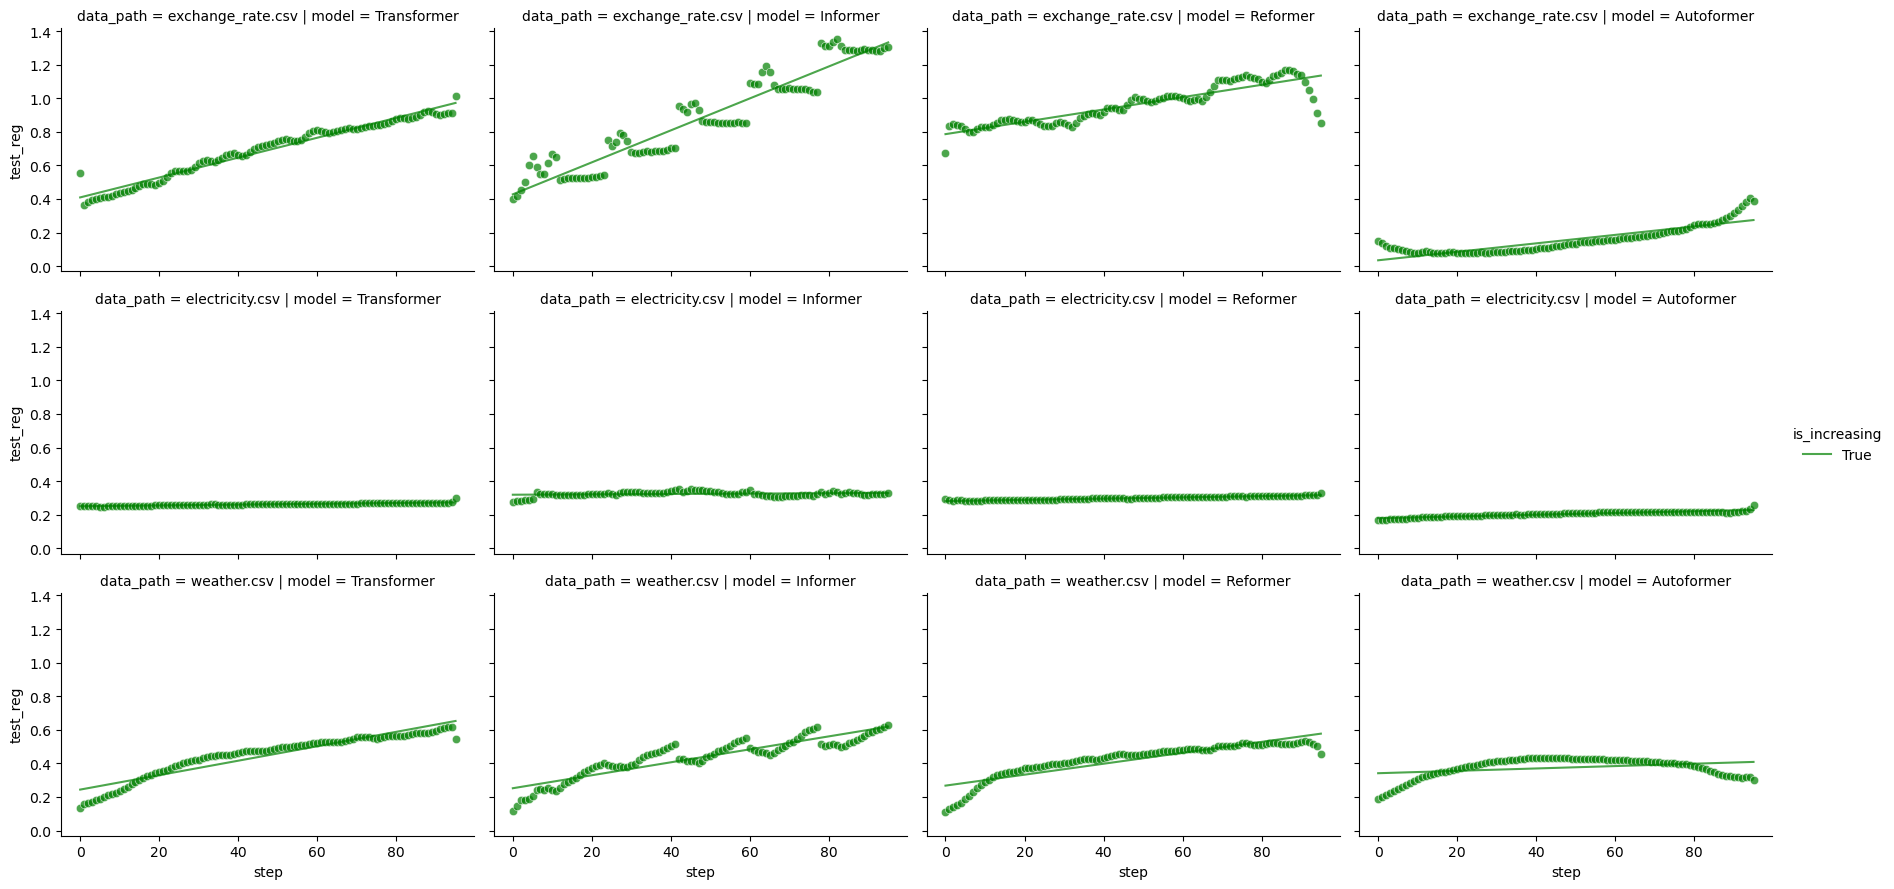

#### **ERM Vs Constrained 192 (split=test, )**

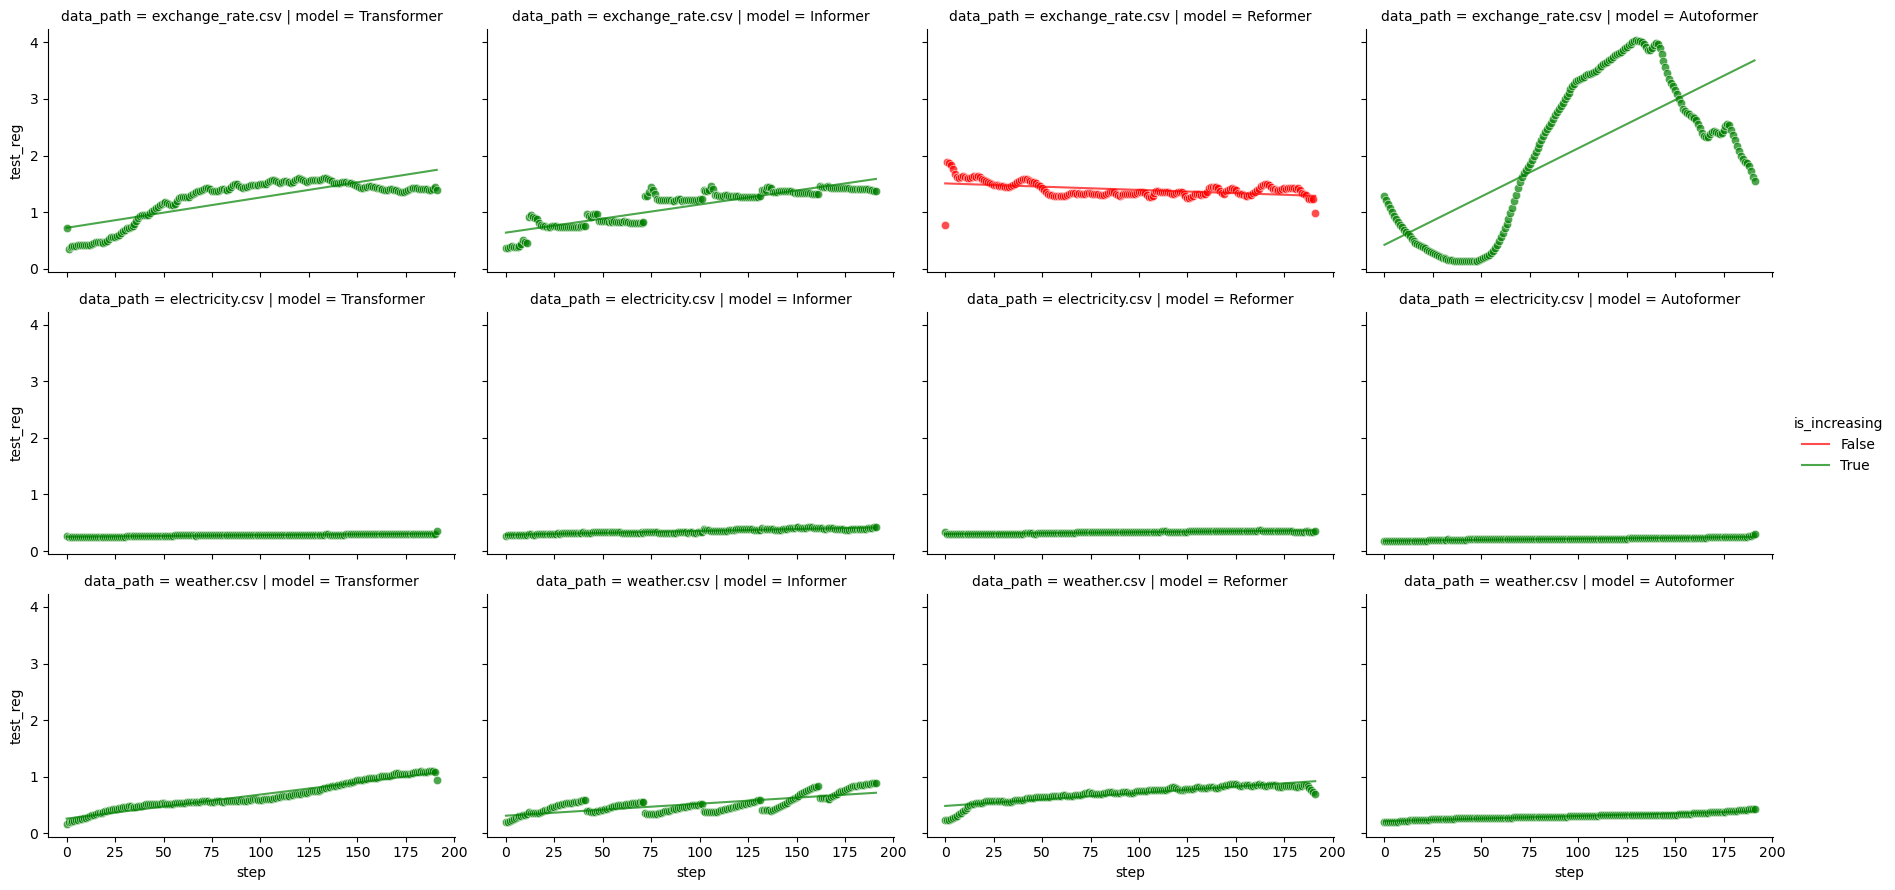

#### **ERM Vs Constrained 336 (split=test, )**

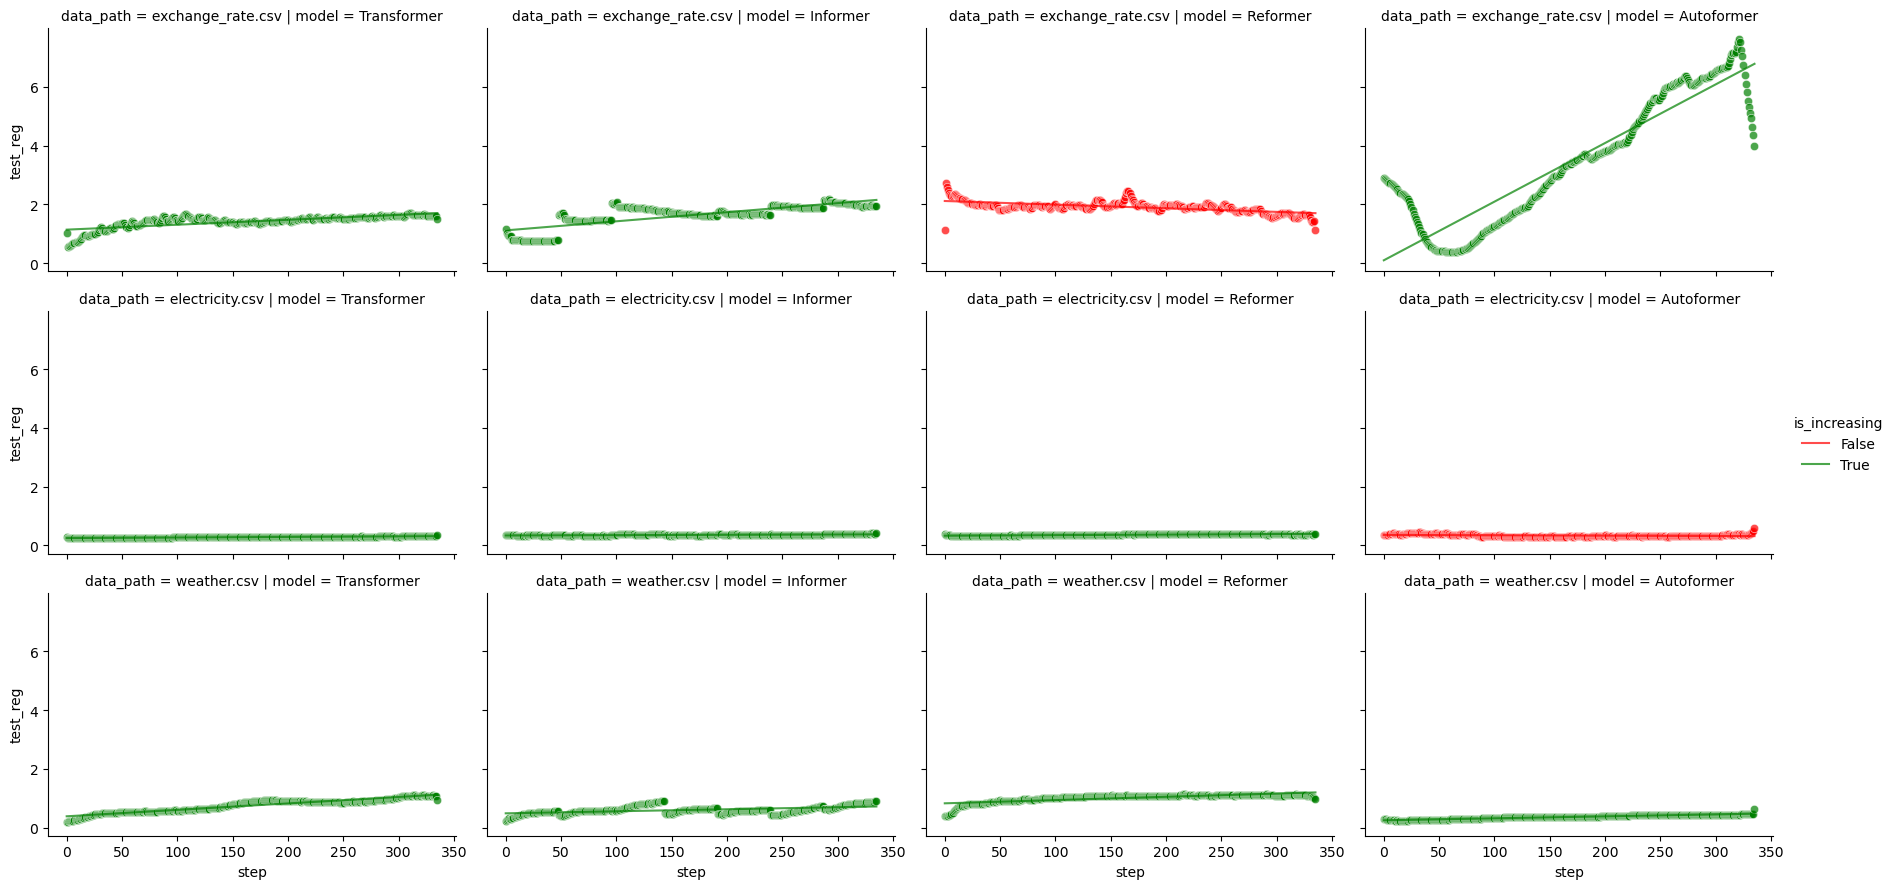

#### **ERM Vs Constrained 720 (split=test, )**

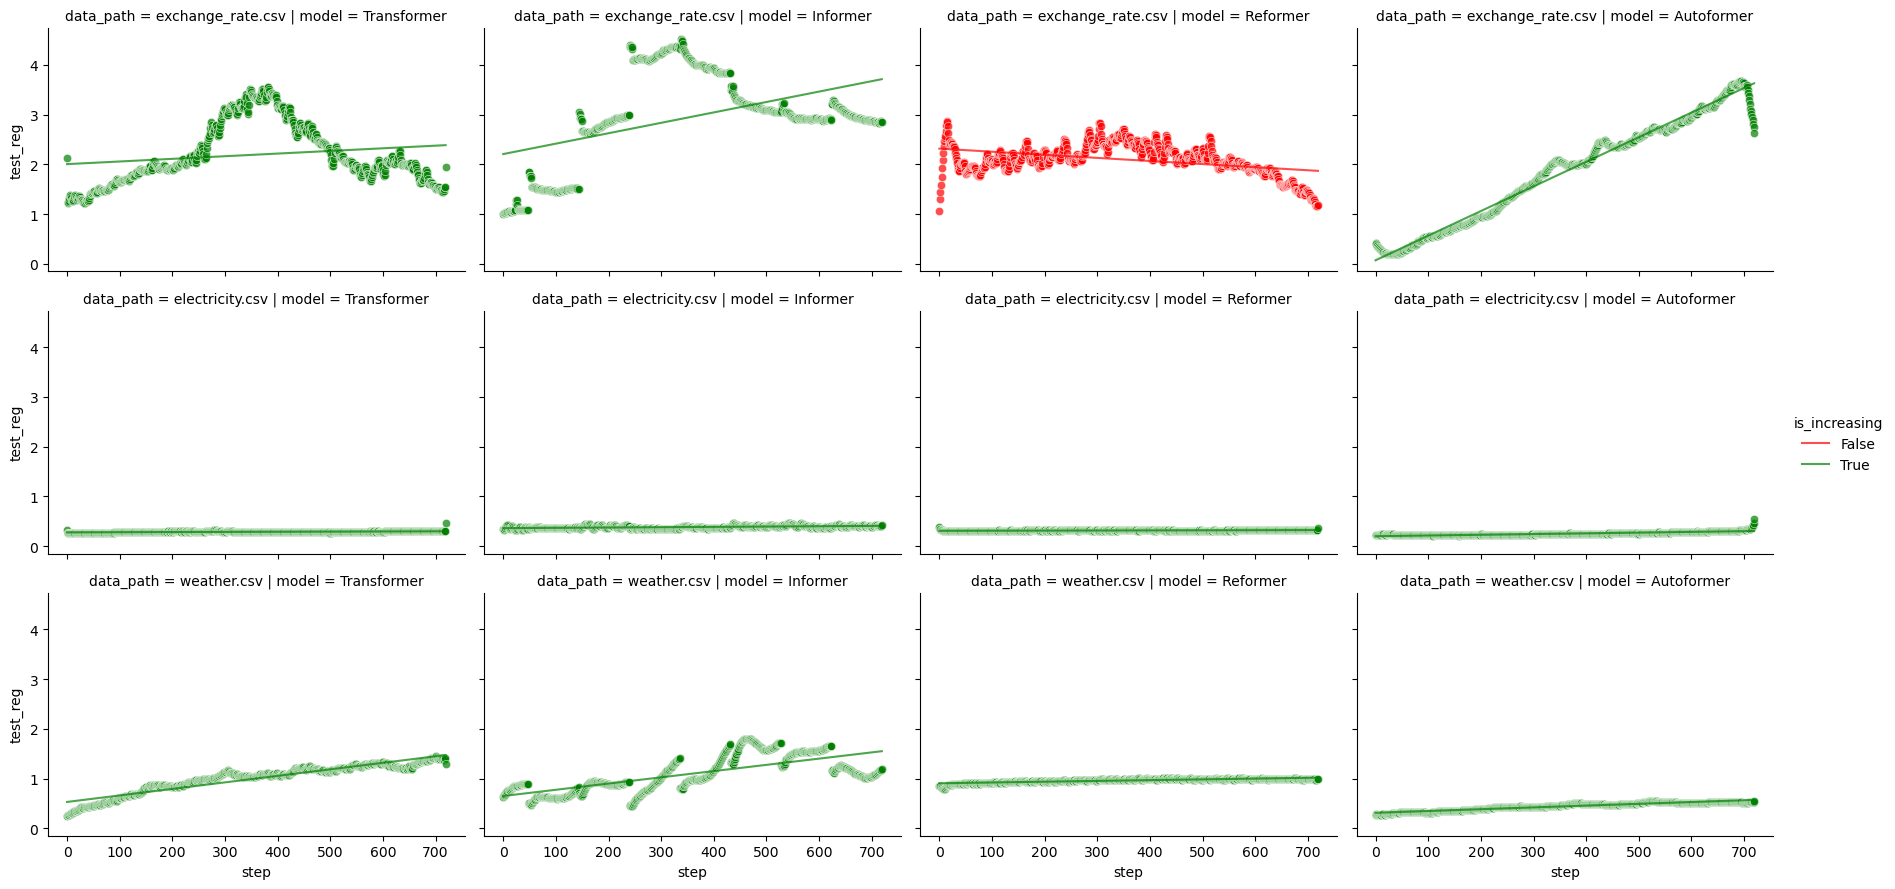

In [47]:
# PARAMS
# import for linear regression fits
from sklearn.linear_model import LinearRegression
split="test"
#constraint_idx = 1 # use the 50 percentile constraint to plot 1=25,2=50,3=75
seed=2021

# Filter
df_pct50_and_erm = df_to_plot[(df_to_plot.seed==seed) & (df_to_plot.split==split)].copy()

PRED_LENS=sorted(df_to_plot.pred_len.unique().tolist())
#PRED_LENS=[96]
for pred_len in PRED_LENS:
    # Add data for constant line
    df_current_plot = df_pct50_and_erm.query('pred_len==@pred_len').copy()
    model = LinearRegression()
    regression_models={}
    for model_name in df_current_plot.model.unique():
        regression_models[model_name] = {}
        for data_path in df_current_plot.data_path.unique():
            df_current_plot_model = df_current_plot.query('model==@model_name & data_path==@data_path').copy()
            model.fit(df_current_plot_model[['step']], df_current_plot_model[['mse']])
            #Update the df_current_plot with the regression predictions
            df_current_plot.loc[df_current_plot_model.index,'test_reg']=model.predict(df_current_plot_model[['step']])
            df_current_plot.loc[df_current_plot_model.index,'is_increasing']=model.coef_[0][0]>0#model.coef_[0][0]>0.001
            #df_current_plot.iloc['test_reg']=model.predict(df_current_plot_model[['step']])
            #regression_models[model_name][data_path] = model.predict(df_current_plot_model[['step']])
    model.fit(df_current_plot[['step']], df_current_plot[['mse']])
    
    #constraint_level = df_current_plot.constraint_level.unique()[0]
    #df_current_plot['constraint_level'] = constraint_level
    display(Markdown(f"#### **ERM Vs Constrained {pred_len} (split={split}, )**"))

    g = sns.FacetGrid(df_current_plot, col='model', row='data_path',hue='is_increasing', height=3, aspect=1.5, legend_out=True,palette={True:"green",False:"red"})
    #g.map(sns.lineplot, "step", "constraint_level", alpha=.7)
    g.map(sns.scatterplot, "step", "mse", alpha=.7)
    g.map(sns.lineplot, "step", "test_reg", alpha=.7)
    g.add_legend()
    #TODO fix and uncomment
    #g.savefig(f"{FIGURES_FOLDER}/constrained_vs_erm_{pred_len}_{str(constraint_level).replace('.','')}.png")
    plt.show()

### Val

#### **ERM Vs Constrained 96 (split=val, )**

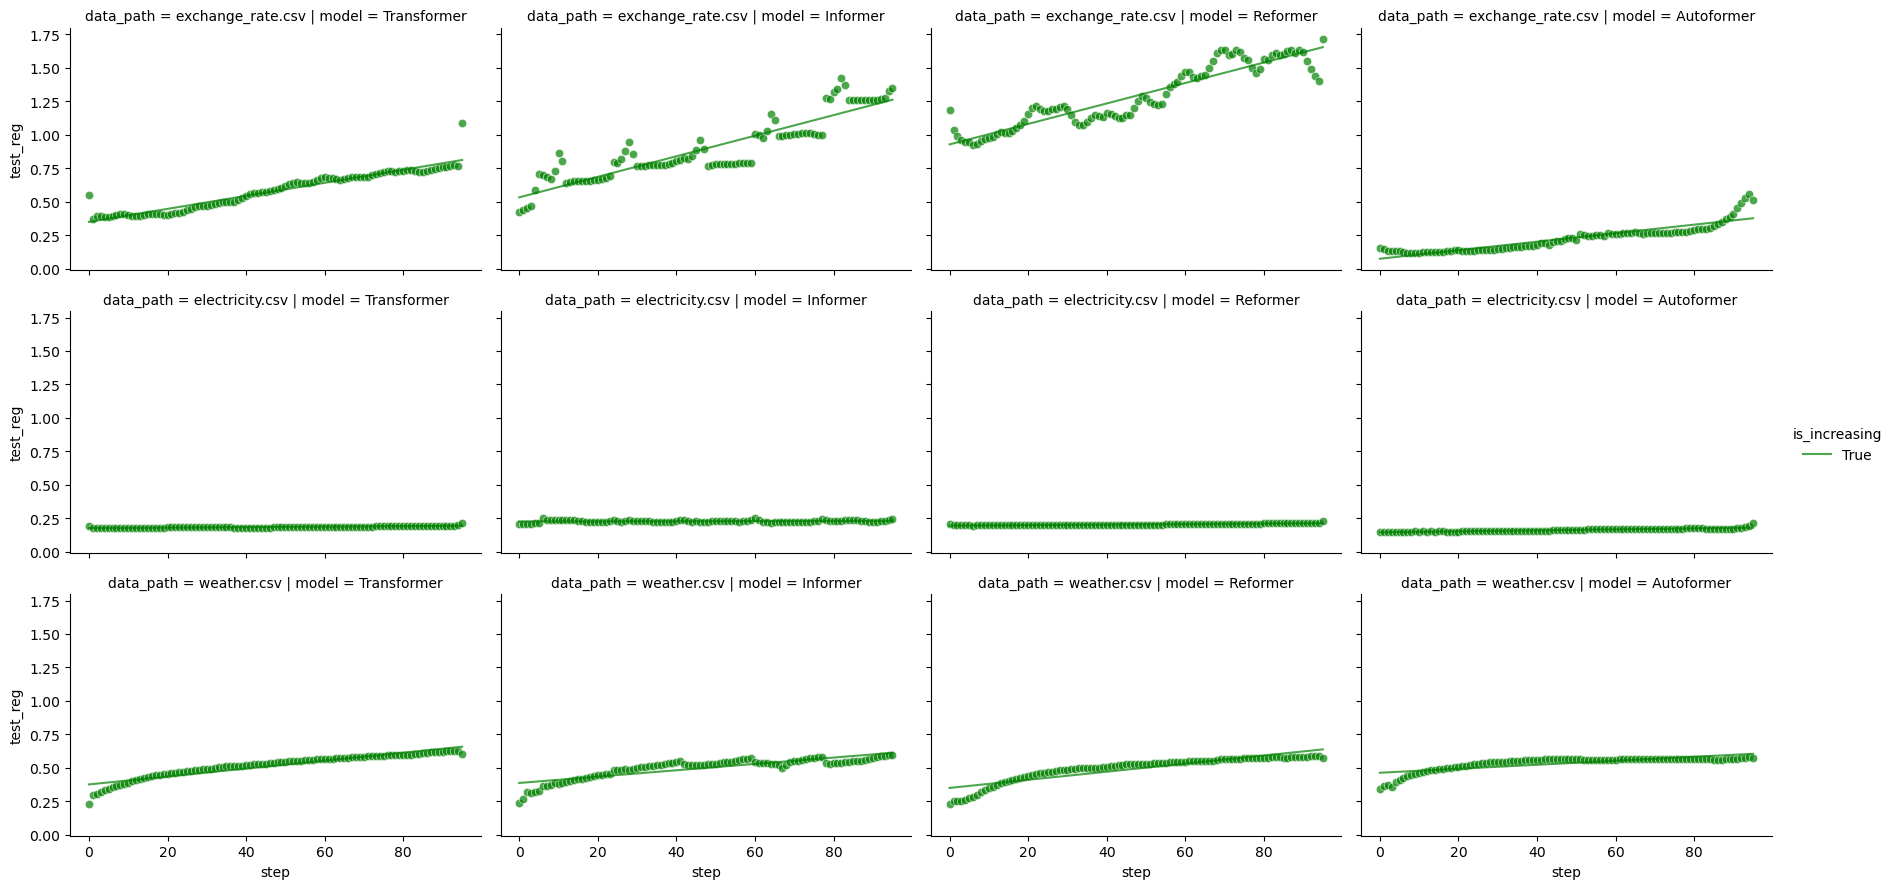

#### **ERM Vs Constrained 192 (split=val, )**

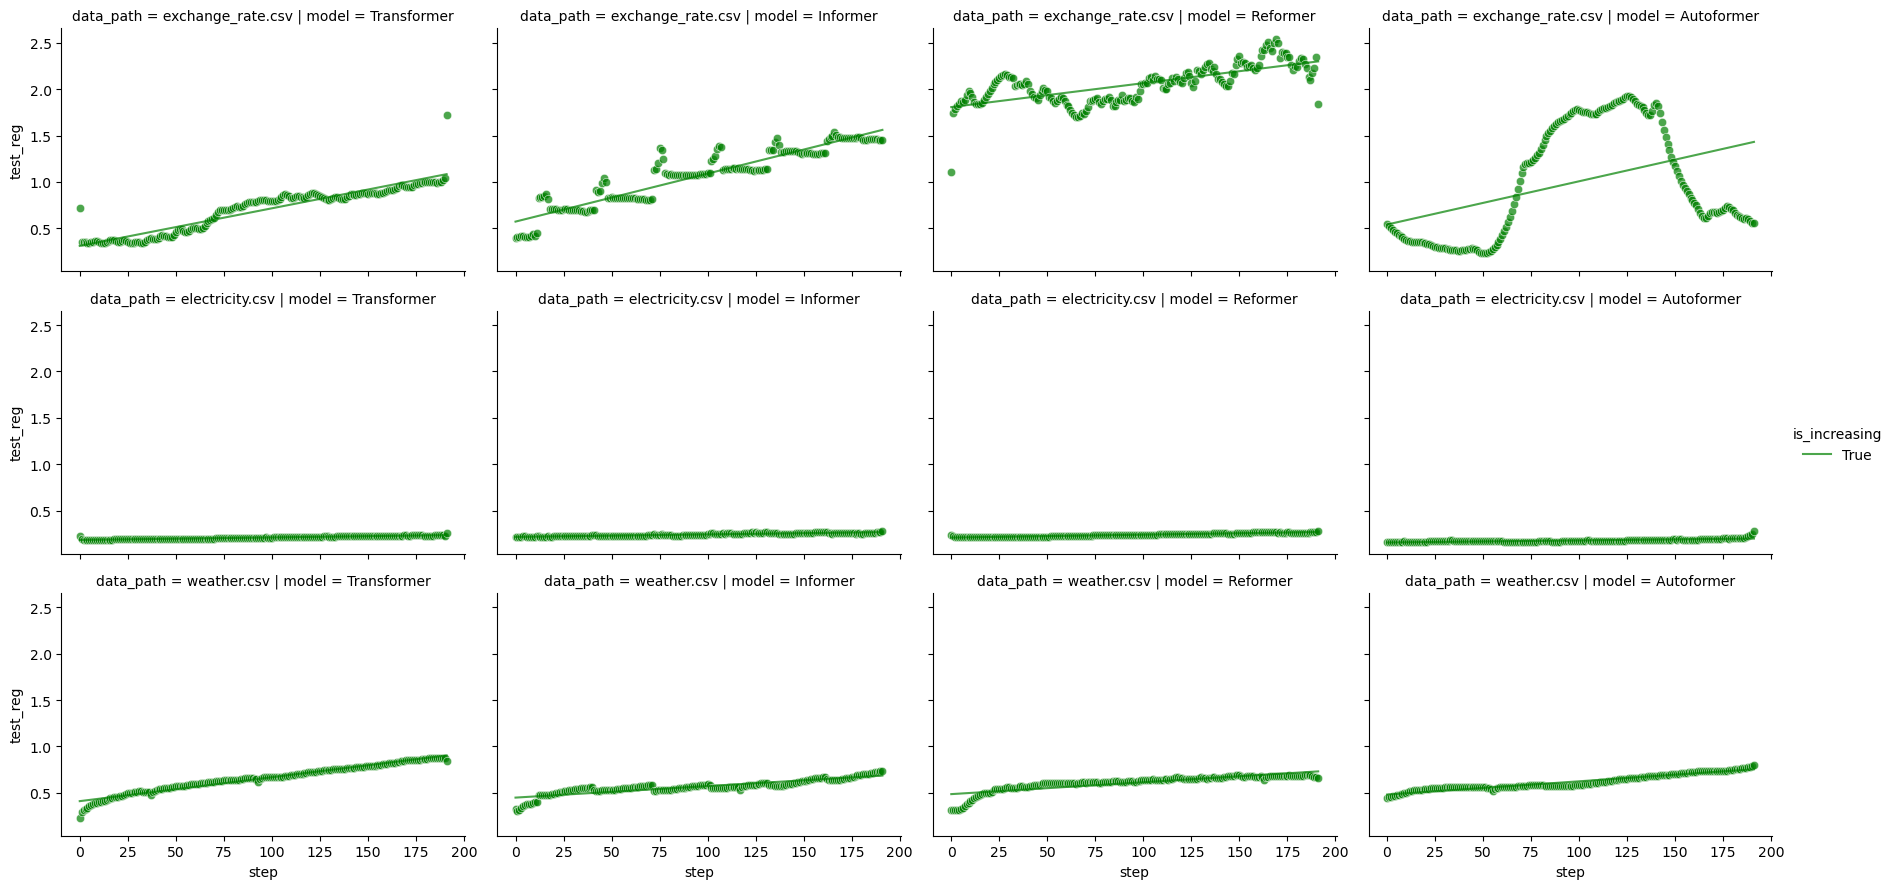

#### **ERM Vs Constrained 336 (split=val, )**

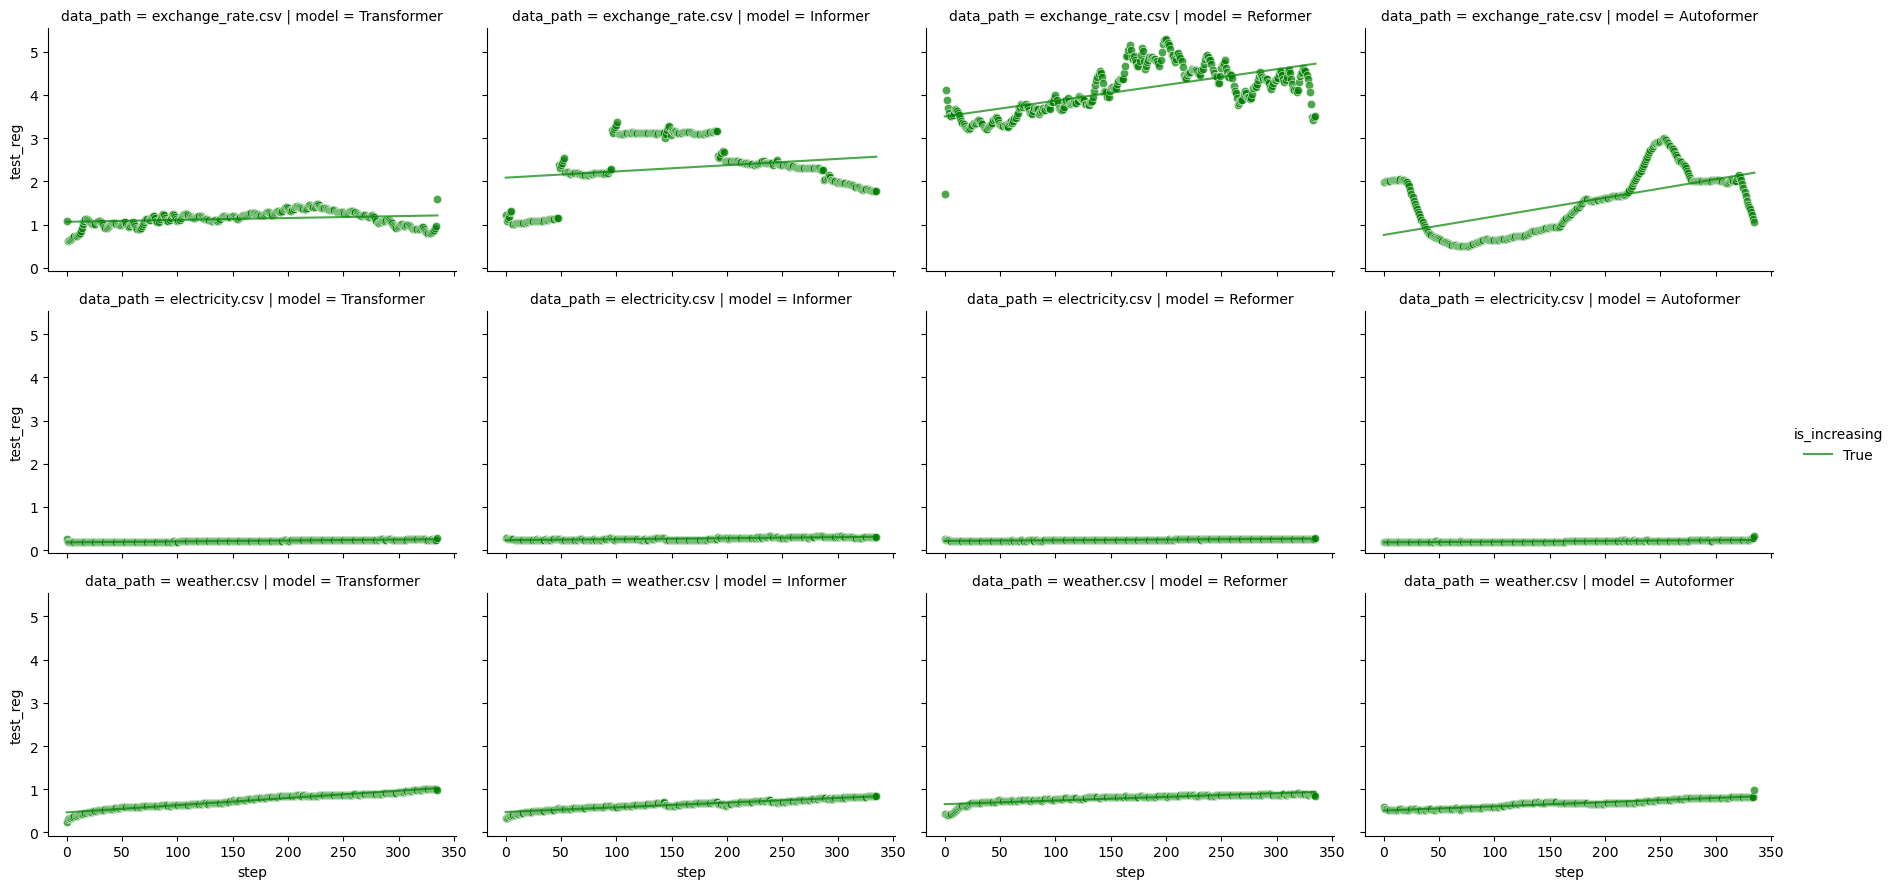

#### **ERM Vs Constrained 720 (split=val, )**

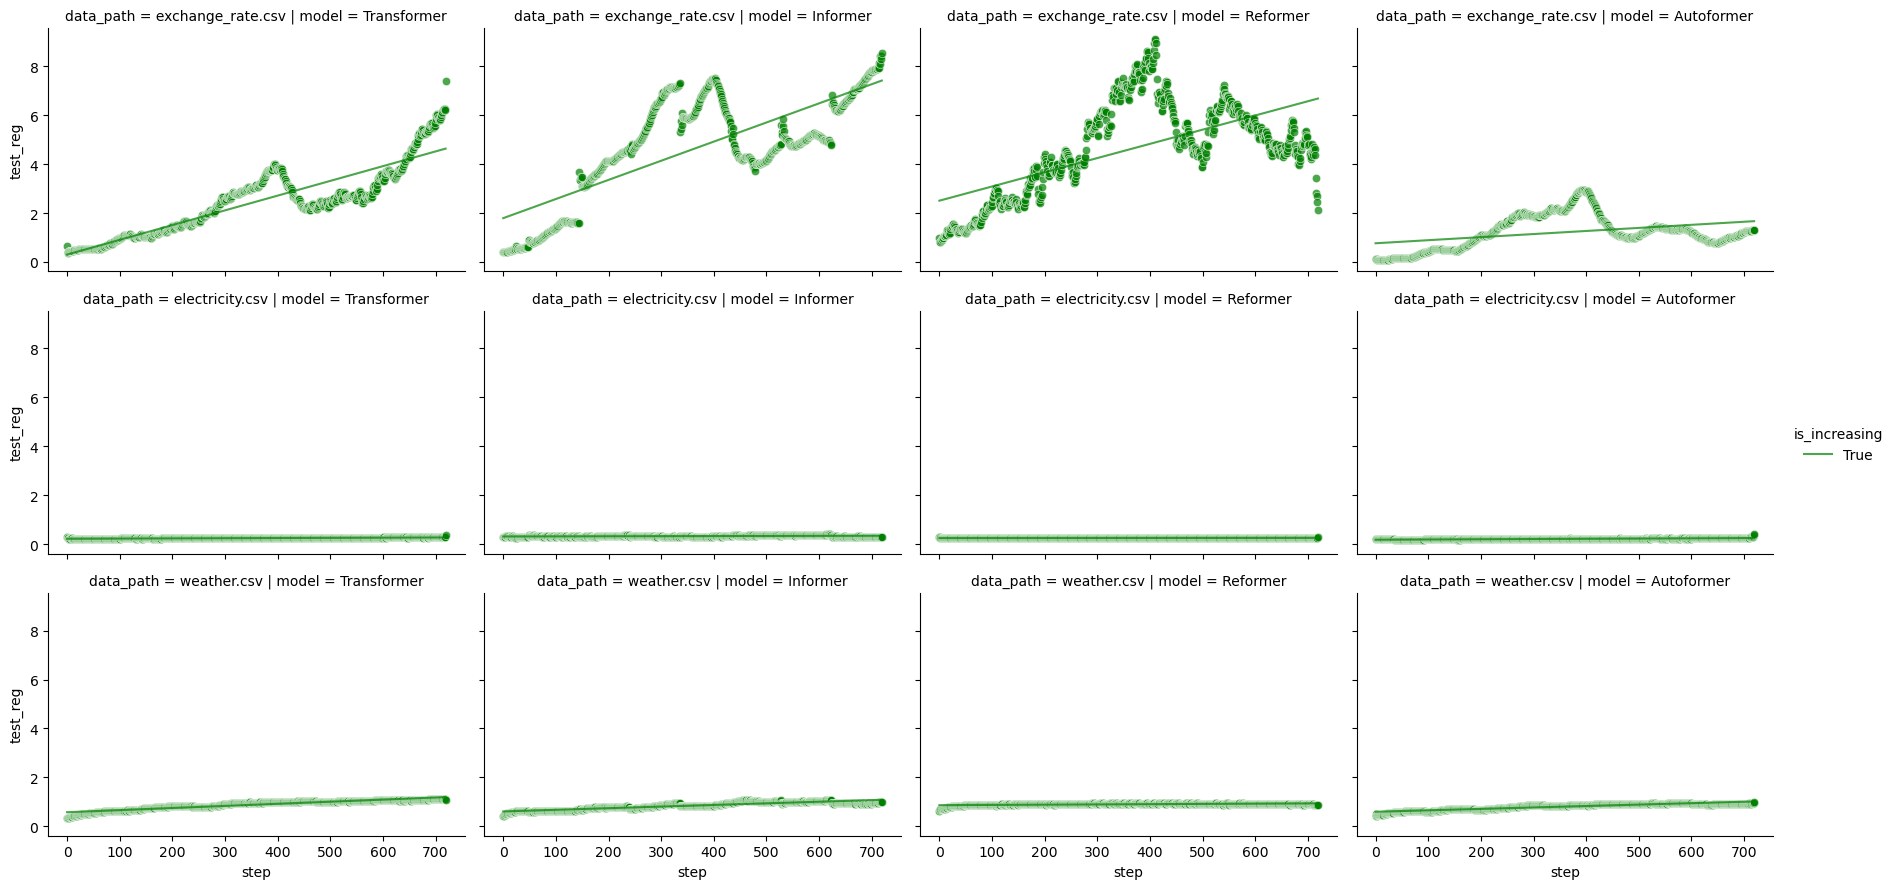

In [52]:
# PARAMS
# import for linear regression fits
from sklearn.linear_model import LinearRegression
split="val"
#constraint_idx = 1 # use the 50 percentile constraint to plot 1=25,2=50,3=75
seed=2021

# Filter
df_pct50_and_erm = df_to_plot[(df_to_plot.seed==seed) & (df_to_plot.split==split)].copy()

PRED_LENS=sorted(df_to_plot.pred_len.unique().tolist())
#PRED_LENS=[96]
for pred_len in PRED_LENS:
    # Add data for constant line
    df_current_plot = df_pct50_and_erm.query('pred_len==@pred_len').copy()
    
    regression_models={}
    for model_name in df_current_plot.model.unique():
        regression_models[model_name] = {}
        for data_path in df_current_plot.data_path.unique():
            df_current_plot_model = df_current_plot.query('model==@model_name & data_path==@data_path').copy()
            model = LinearRegression()
            model.fit(df_current_plot_model[['step']], df_current_plot_model[['mse']])
            #Update the df_current_plot with the regression predictions
            df_current_plot.loc[df_current_plot_model.index,'test_reg']=model.predict(df_current_plot_model[['step']])
            df_current_plot.loc[df_current_plot_model.index,'is_increasing']=model.coef_[0][0]>0#model.coef_[0][0]>0.001
            # slope: 
            df_current_plot.loc[df_current_plot_model.index,'slope']=model.coef_[0][0]
            # intercept
            df_current_plot.loc[df_current_plot_model.index,'intercept']=model.intercept_[0]
            #df_current_plot.iloc['test_reg']=model.predict(df_current_plot_model[['step']])
            #regression_models[model_name][data_path] = model.predict(df_current_plot_model[['step']])
    model.fit(df_current_plot[['step']], df_current_plot[['mse']])
    
    #constraint_level = df_current_plot.constraint_level.unique()[0]
    #df_current_plot['constraint_level'] = constraint_level
    display(Markdown(f"#### **ERM Vs Constrained {pred_len} (split={split}, )**"))

    g = sns.FacetGrid(df_current_plot, col='model', row='data_path', hue='is_increasing', height=3, aspect=1.5, legend_out=True,palette={True:"green",False:"red"})
    #g.map(sns.lineplot, "step", "constraint_level", alpha=.7)
    g.map(sns.scatterplot, "step", "mse", alpha=.7)
    g.map(sns.lineplot, "step", "test_reg", alpha=.7)
    g.add_legend()
    #TODO fix and uncomment
    #g.savefig(f"{FIGURES_FOLDER}/constrained_vs_erm_{pred_len}_{str(constraint_level).replace('.','')}.png")
    plt.show()
# display All of the 

## Parameter generation for sweep

In [55]:
# PARAMS
# import for linear regression fits
from sklearn.linear_model import LinearRegression
split="val"
#constraint_idx = 1 # use the 50 percentile constraint to plot 1=25,2=50,3=75
seed=2021

# Filter
df_pct50_and_erm = df_to_plot[(df_to_plot.seed==seed) & (df_to_plot.split==split)].copy()

PRED_LENS=sorted(df_to_plot.pred_len.unique().tolist())
regression_models={}
for data_path in df_current_plot.data_path.unique():
    regression_models[data_path] = {}
    for model_name in df_current_plot.model.unique():
        regression_models[data_path][model_name] = {}
        for pred_len in PRED_LENS:
            # Add data for constant line
            df_current_model = df_pct50_and_erm.query('model==@model_name and data_path==@data_path and pred_len==@pred_len').copy()
            model = LinearRegression()
            model.fit(df_current_model[['step']], df_current_model[['mse']])
            #df_current_plot.iloc['test_reg']=model.predict(df_current_plot_model[['step']])
            regression_models[data_path][model_name][pred_len] = {
                'constraint_slope':model.coef_[0][0],
                'constraint_offset':model.intercept_[0]
            }

In [56]:
regression_models

{'exchange_rate.csv': {'Transformer': {96: {'constraint_slope': 0.0048721632772144,
    'constraint_offset': 0.3485848905256216},
   192: {'constraint_slope': 0.004052669820392038,
    'constraint_offset': 0.3104082279660076},
   336: {'constraint_slope': 0.0004373680825867109,
    'constraint_offset': 1.065416613917693},
   720: {'constraint_slope': 0.0060212468950883394,
    'constraint_offset': 0.3024330213060873}},
  'Informer': {96: {'constraint_slope': 0.007684555774877013,
    'constraint_offset': 0.5321727667797573},
   192: {'constraint_slope': 0.005181187085308707,
    'constraint_offset': 0.5723228000493683},
   336: {'constraint_slope': 0.0014479390402535252,
    'constraint_offset': 2.086622595441734},
   720: {'constraint_slope': 0.007817946384975672,
    'constraint_offset': 1.7904814601478427}},
  'Reformer': {96: {'constraint_slope': 0.007653235095920477,
    'constraint_offset': 0.9281595112992725},
   192: {'constraint_slope': 0.002579410895460663,
    'constraint_of

### Multipliers over the window

#### **Multipliers vs loss 96 (split=train, constraint_idx=2)**

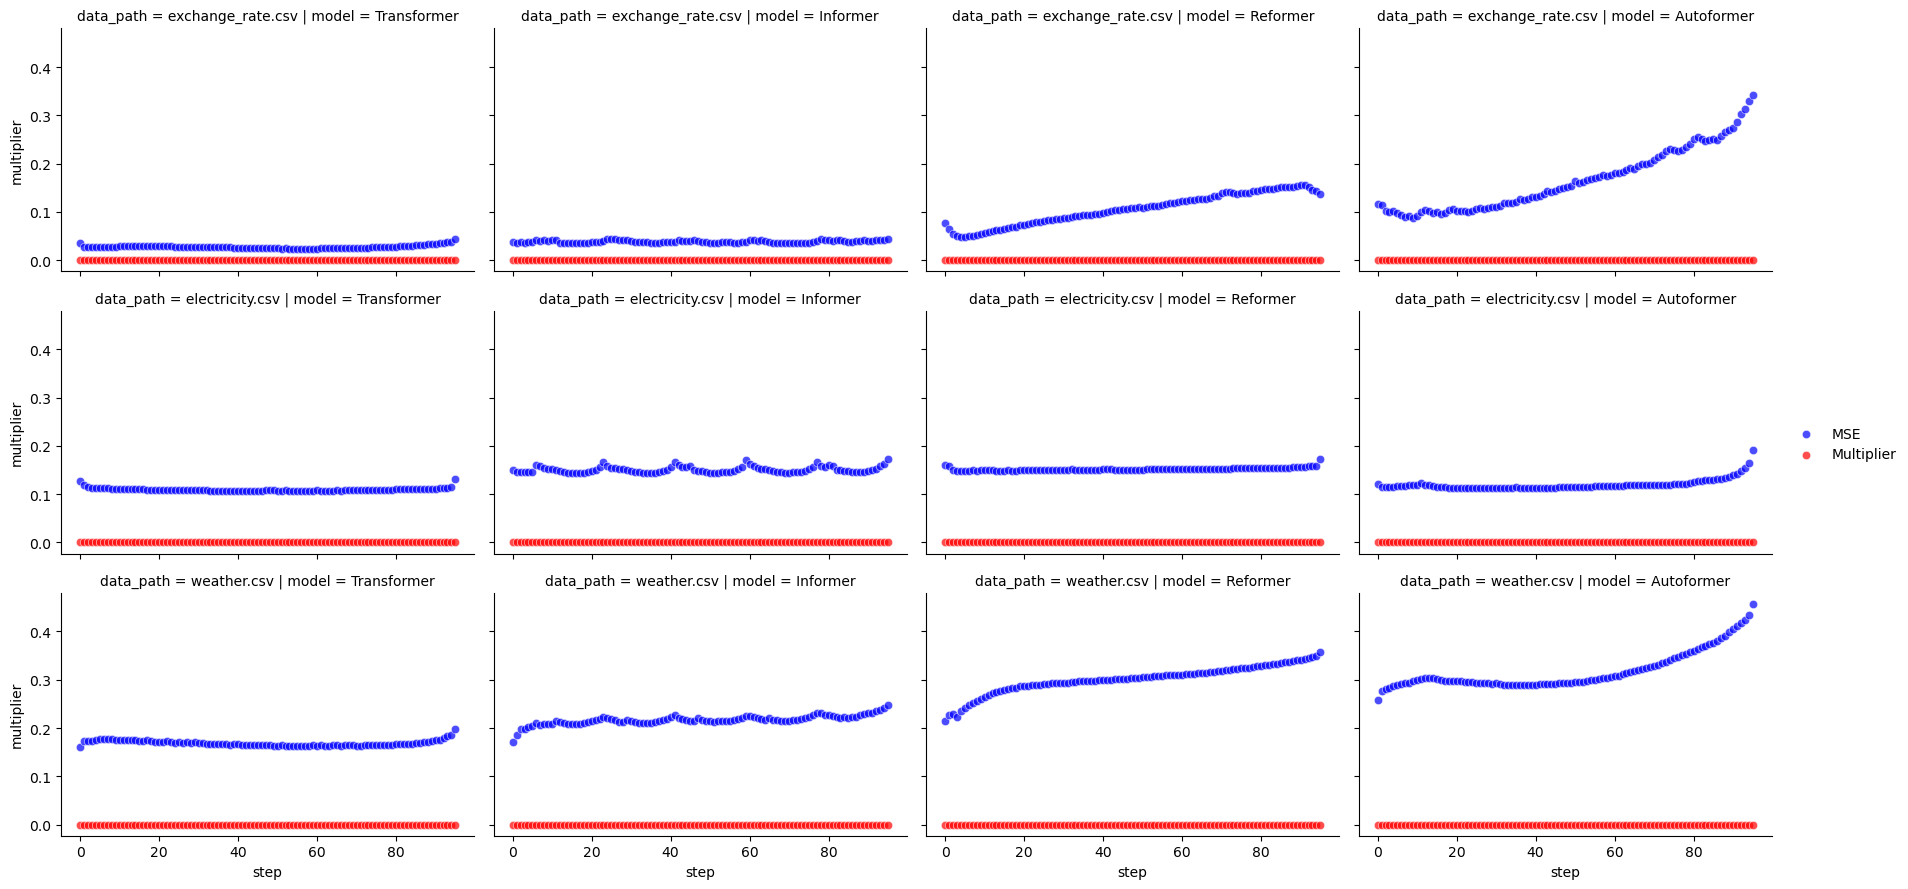

#### **Multipliers vs loss 192 (split=train, constraint_idx=2)**

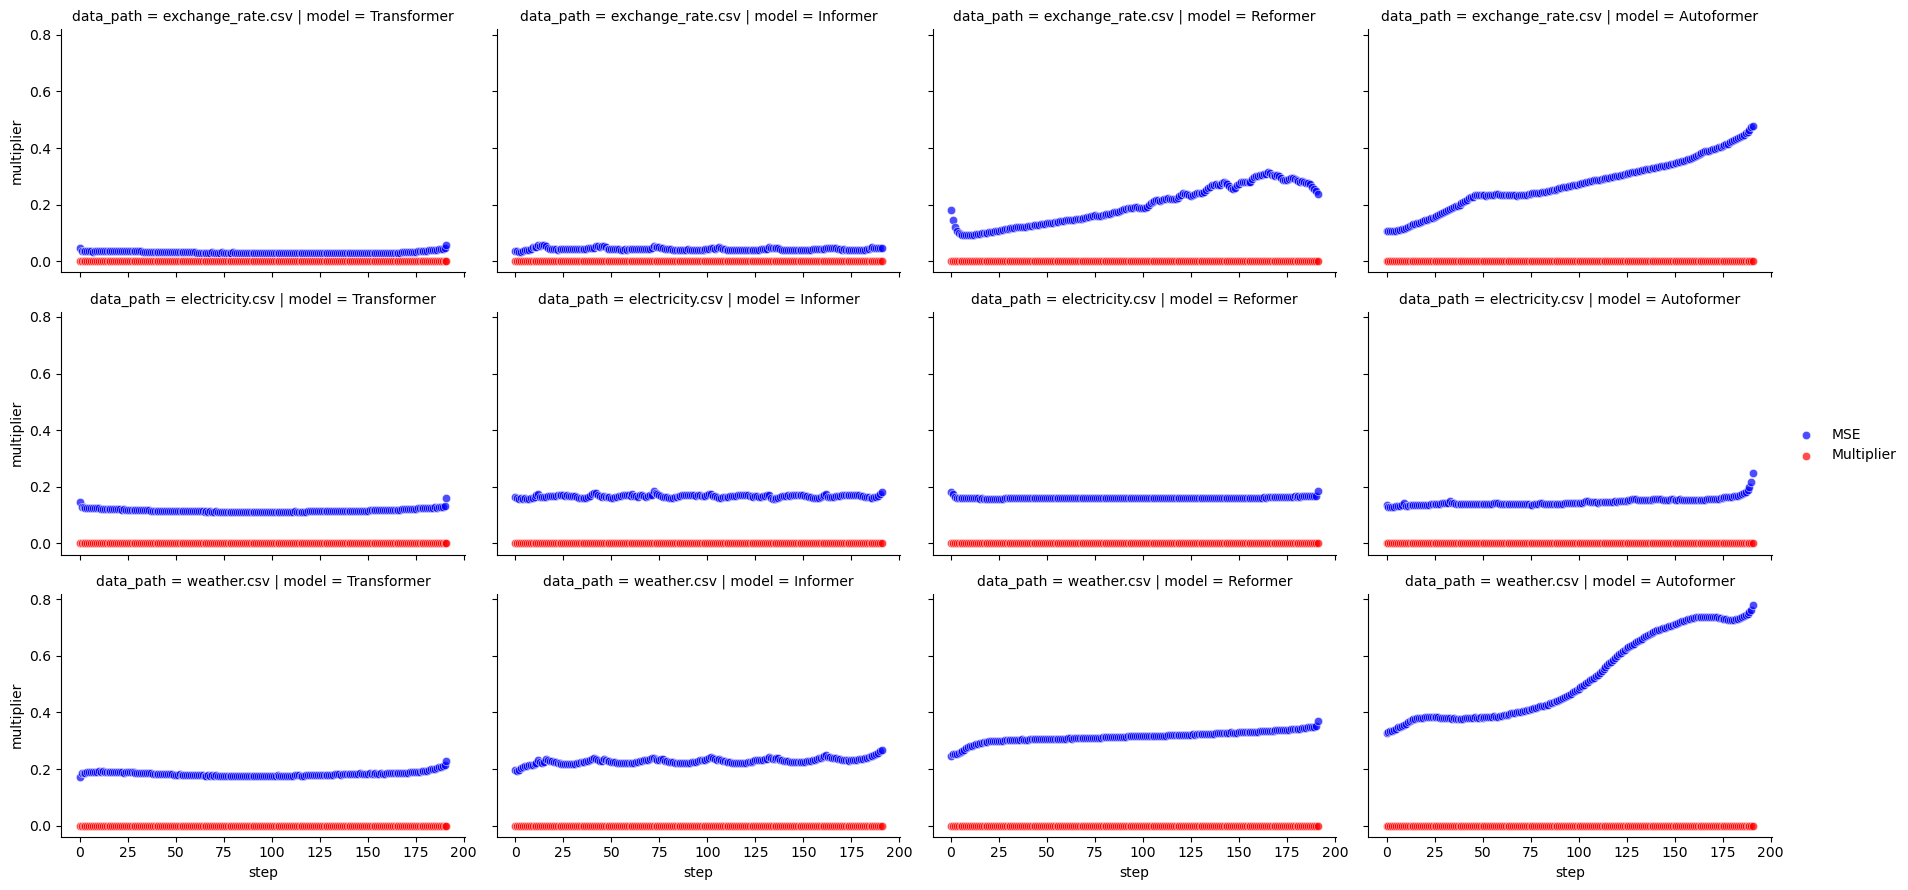

#### **Multipliers vs loss 336 (split=train, constraint_idx=2)**

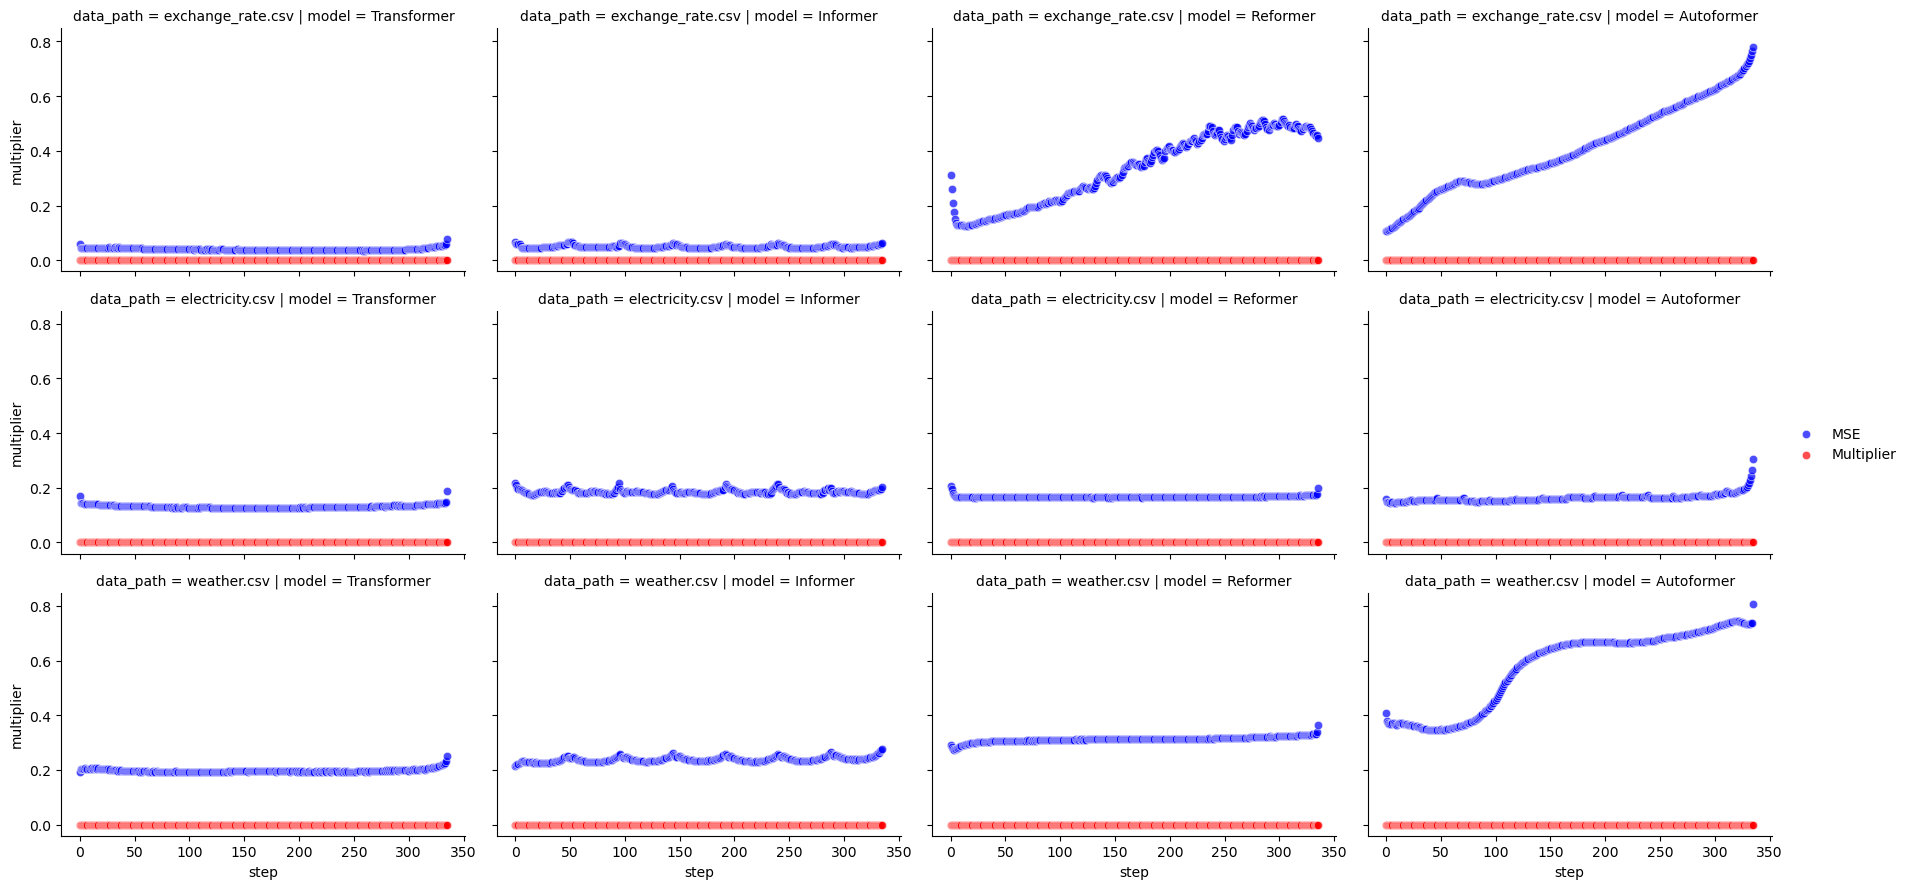

#### **Multipliers vs loss 720 (split=train, constraint_idx=2)**

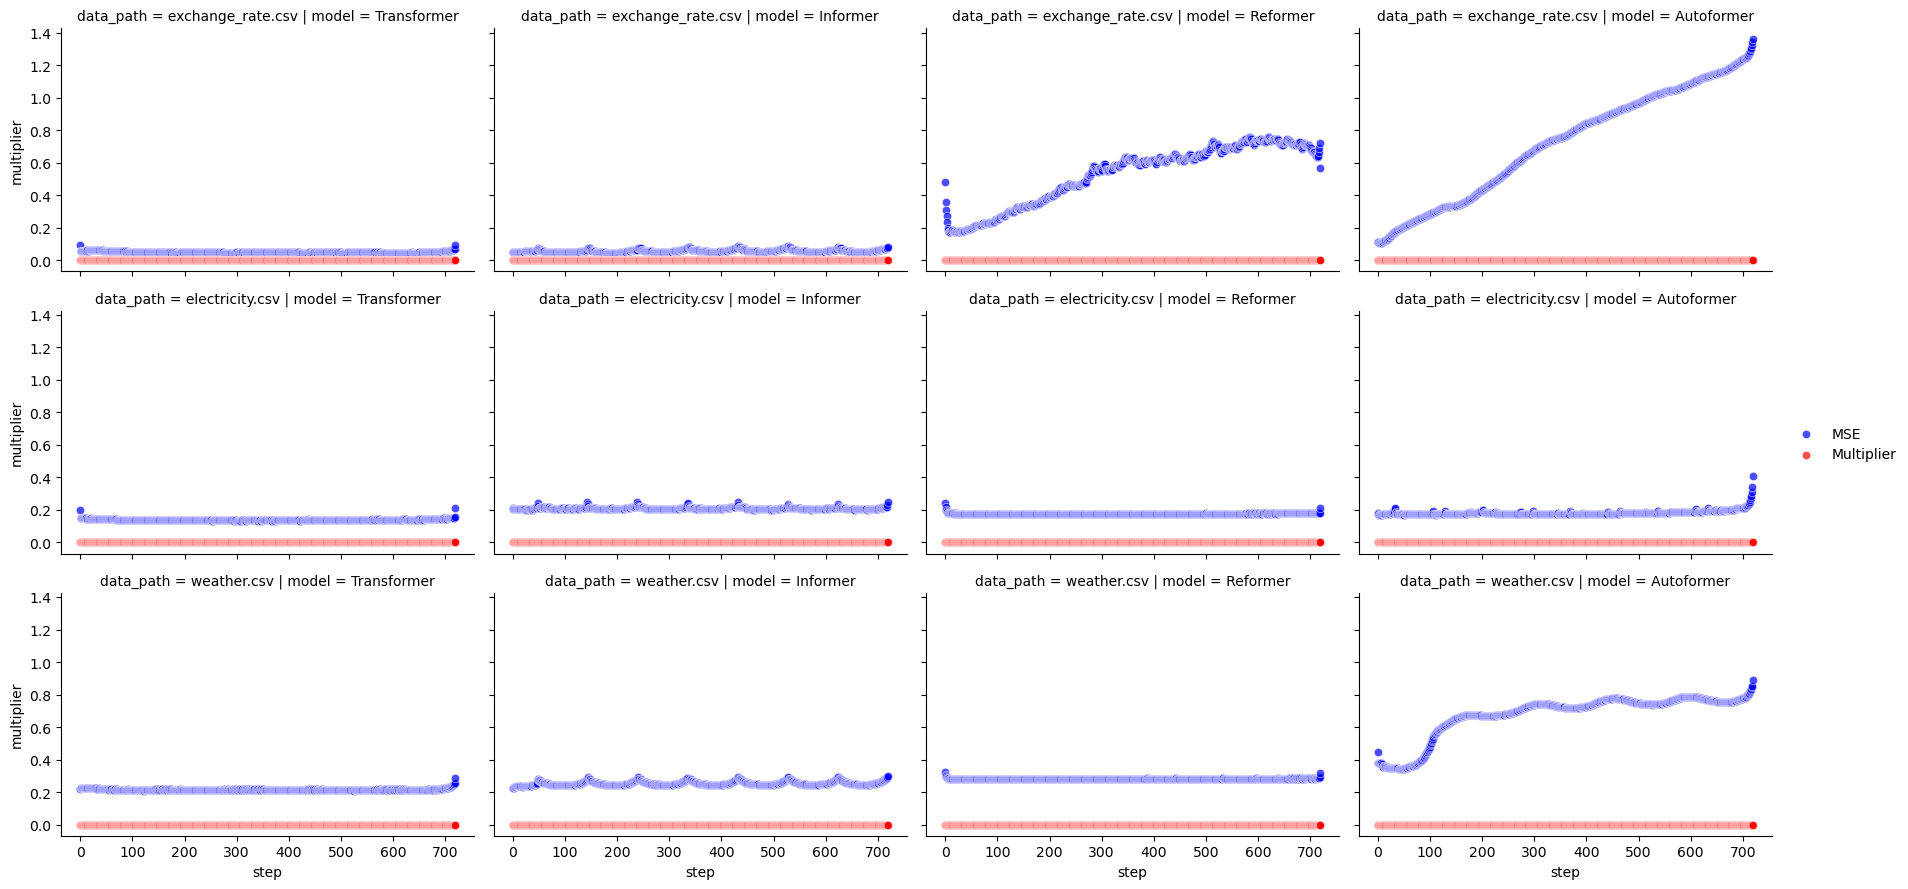

In [44]:
# PARAMS
split="train"
constraint_idx = 2 # use the 50 percentile constraint to plot 1=25,2=50,3=75
seed=2021

# Filter
df_pct50 = df_to_plot[
    (df_to_plot.constraint_idx.isin([0,constraint_idx])) 
    & (df_to_plot.seed==seed) & (df_to_plot.split==split)
    & (df_to_plot.constraint_type=="constant")
    ].copy()

PRED_LENS=sorted(df_to_plot.pred_len.unique().tolist())
#PRED_LENS=[96]
for pred_len in PRED_LENS:
    # Add data for constant line
    df_current_plot = df_pct50.query('pred_len==@pred_len').copy()
    #constraint_level = df_current_plot.constraint_level.unique()[0]
    #df_current_plot['constraint_level'] = constraint_level
    display(Markdown(f"#### **Multipliers vs loss {pred_len} (split={split}, constraint_idx={constraint_idx})**"))

    g = sns.FacetGrid(df_current_plot, col='model', row='data_path', height=3, aspect=1.5, legend_out=True)
    # Plot multipliers and MSEs
    g.map(sns.scatterplot, "step", "mse", alpha=.7,color='blue',label='MSE')
    g.map(sns.scatterplot, "step", "multiplier", alpha=.7,color='red',label='Multiplier')
    # Add legend the series

    g.add_legend()
    #g.savefig(f"{FIGURES_FOLDER}/constrained_vs_erm_{pred_len}_{str(constraint_level).replace('.','')}.png")
    plt.show()

### (old) ERM vs constrained

[ 0.181  0.226  0.202  0.16  -1.   ]


### Dataset: electricity.csv pred_len: 96 constraint_level: 0.181

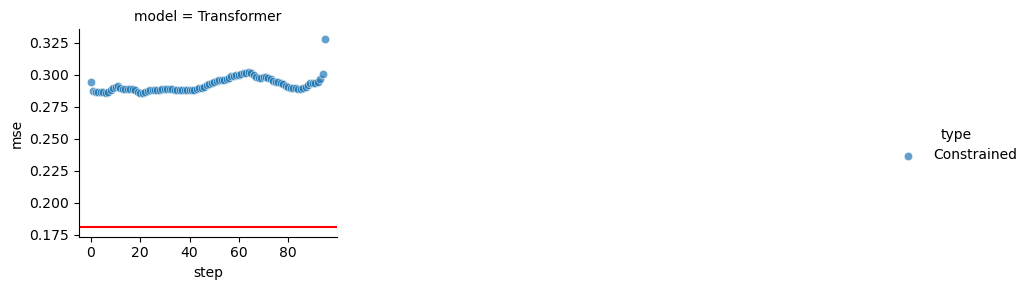

### Dataset: electricity.csv pred_len: 96 constraint_level: 0.226

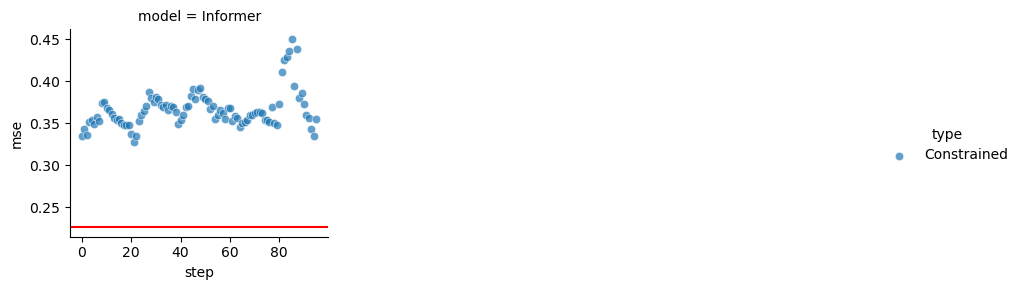

### Dataset: electricity.csv pred_len: 96 constraint_level: 0.202

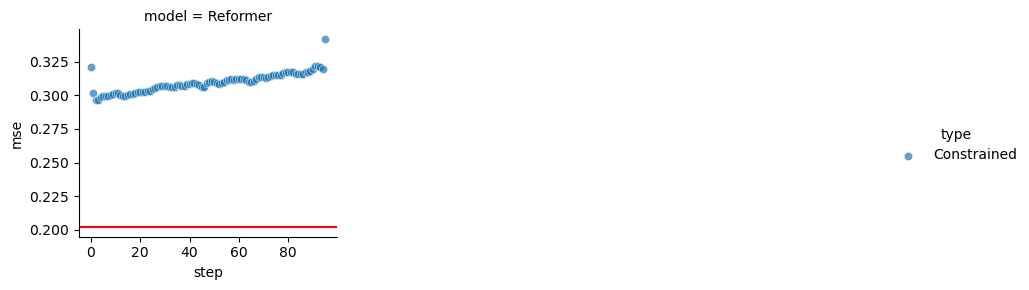

### Dataset: electricity.csv pred_len: 96 constraint_level: 0.16

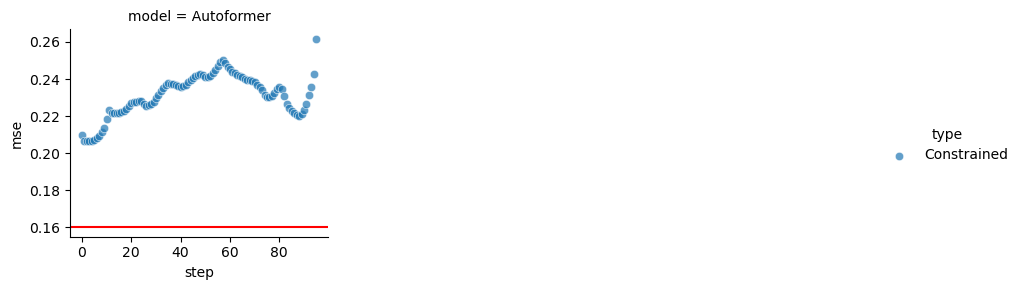

[ 0.211  0.237  0.238  0.184 -1.   ]


### Dataset: electricity.csv pred_len: 192 constraint_level: 0.211

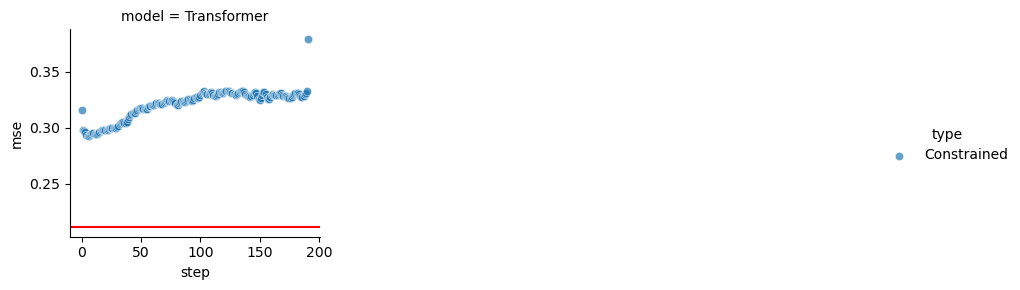

### Dataset: electricity.csv pred_len: 192 constraint_level: 0.237

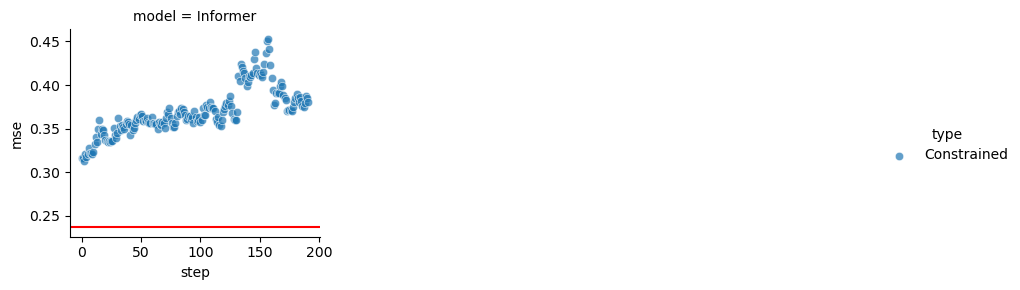

### Dataset: electricity.csv pred_len: 192 constraint_level: 0.238

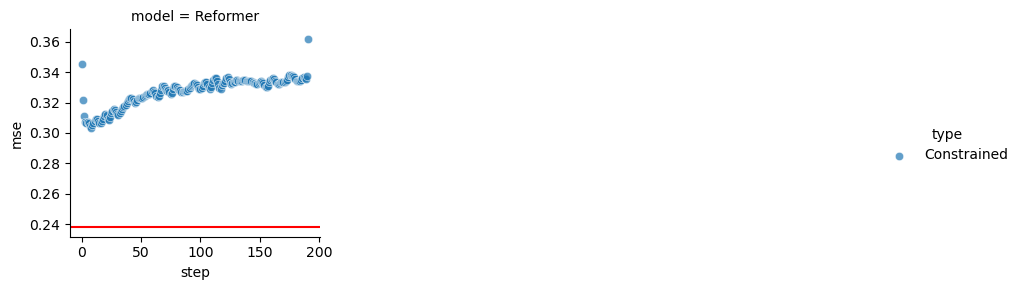

### Dataset: electricity.csv pred_len: 192 constraint_level: 0.184

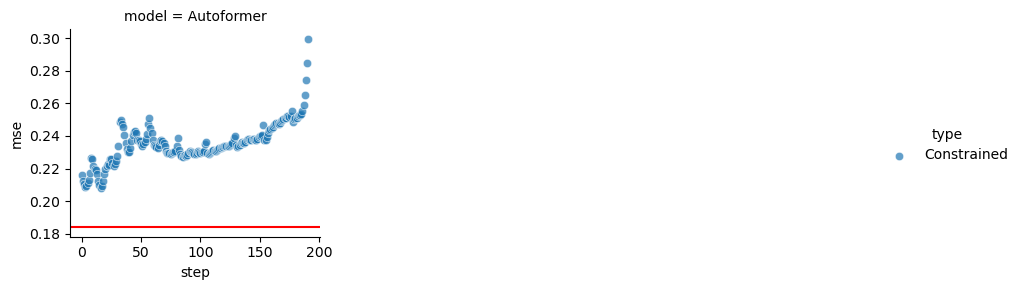

[ 0.211  0.263  0.236  0.207 -1.   ]


### Dataset: electricity.csv pred_len: 336 constraint_level: 0.211

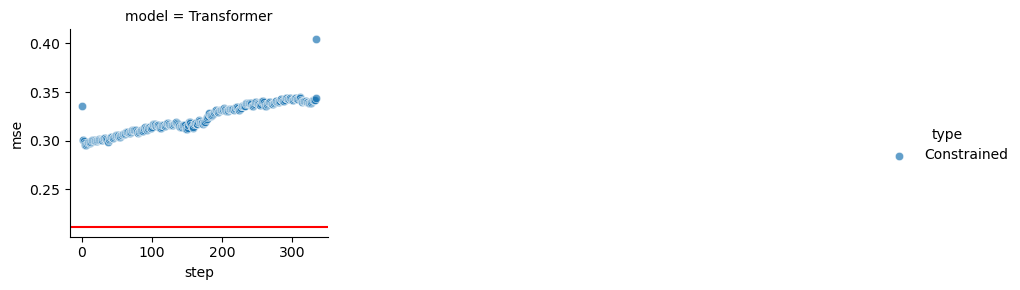

### Dataset: electricity.csv pred_len: 336 constraint_level: 0.263

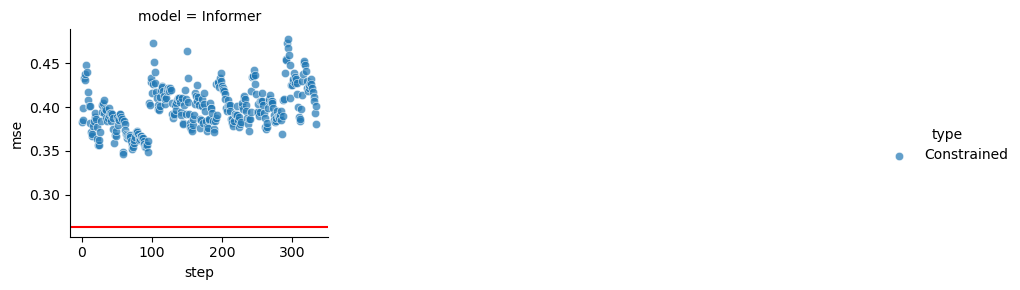

### Dataset: electricity.csv pred_len: 336 constraint_level: 0.236

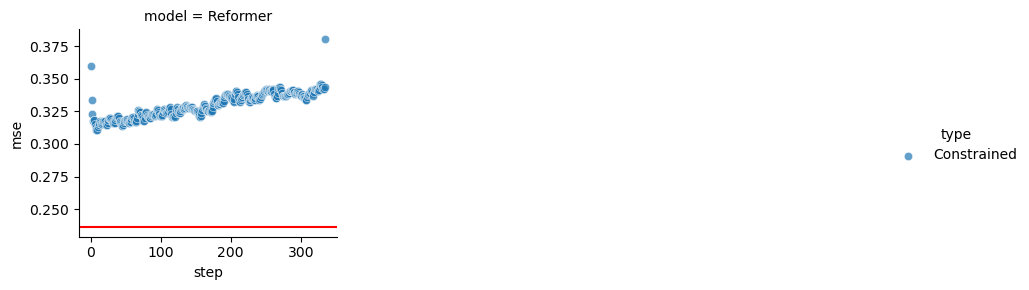

### Dataset: electricity.csv pred_len: 336 constraint_level: 0.207

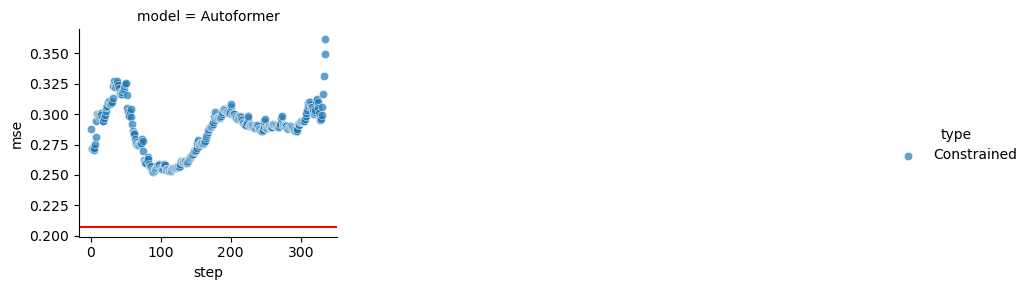

[ 0.239  0.321  0.254  0.228 -1.   ]


### Dataset: electricity.csv pred_len: 720 constraint_level: 0.239

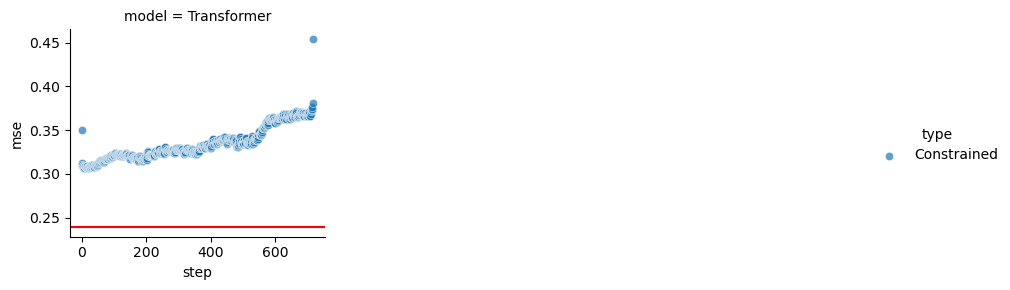

### Dataset: electricity.csv pred_len: 720 constraint_level: 0.321

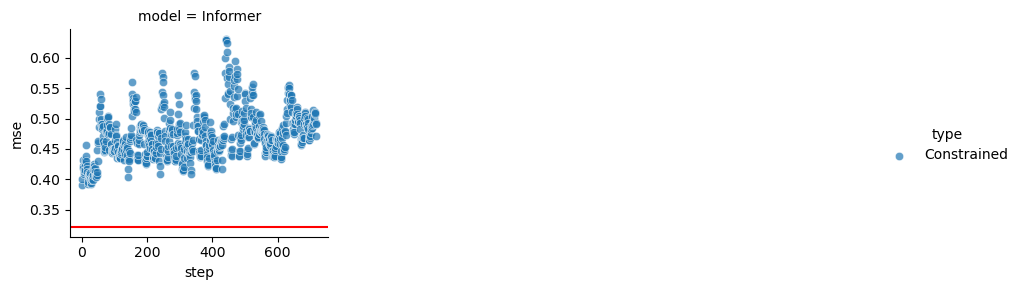

### Dataset: electricity.csv pred_len: 720 constraint_level: 0.254

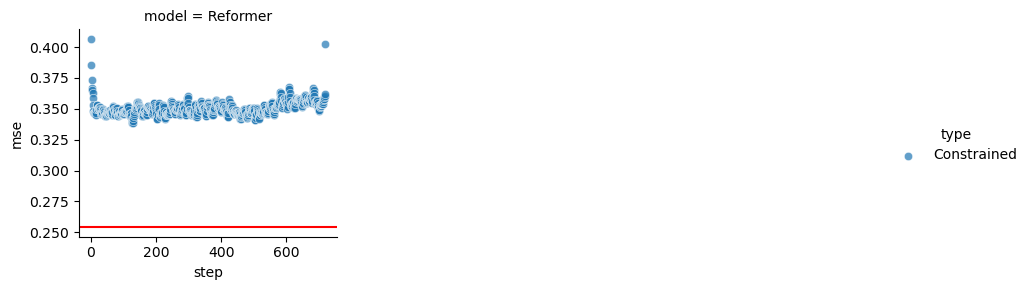

### Dataset: electricity.csv pred_len: 720 constraint_level: 0.228

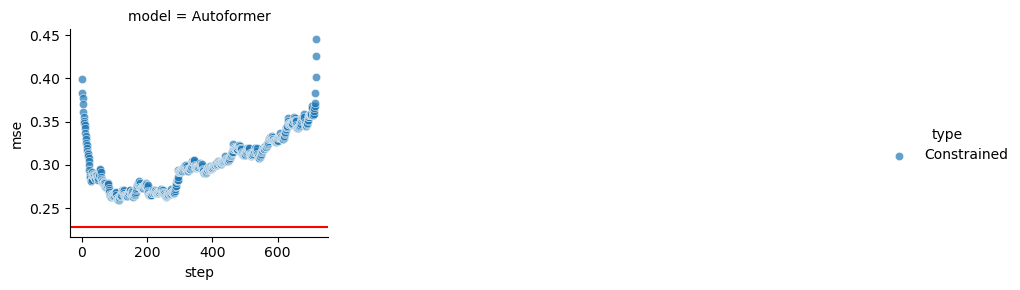

[ 0.562  0.8    1.221  0.217 -1.   ]


### Dataset: exchange_rate.csv pred_len: 96 constraint_level: 0.562

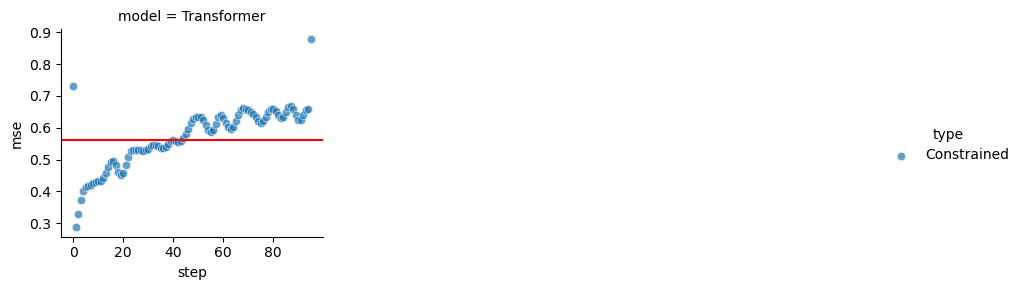

### Dataset: exchange_rate.csv pred_len: 96 constraint_level: 0.8

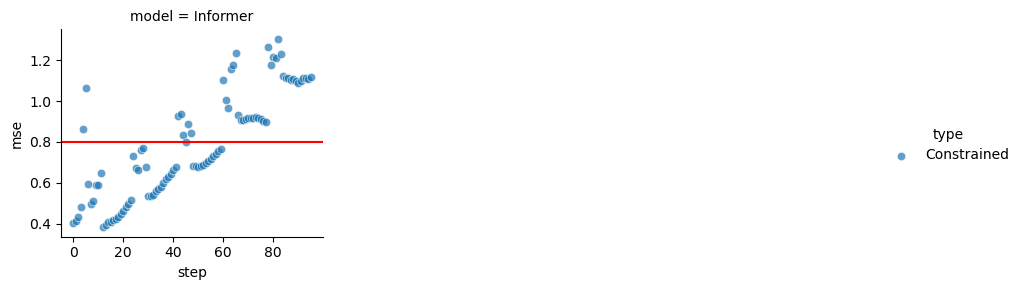

### Dataset: exchange_rate.csv pred_len: 96 constraint_level: 1.221

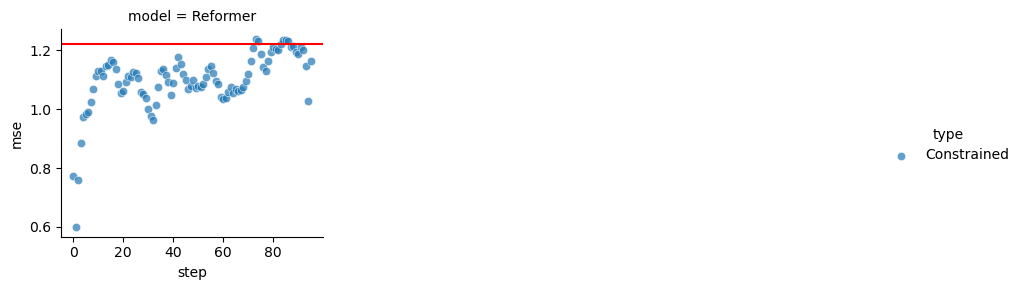

### Dataset: exchange_rate.csv pred_len: 96 constraint_level: 0.217

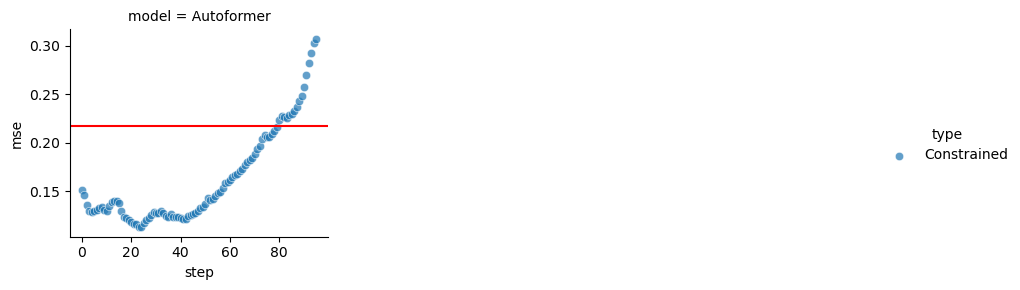

[ 0.798  1.103  2.067  0.742 -1.   ]


### Dataset: exchange_rate.csv pred_len: 192 constraint_level: 0.798

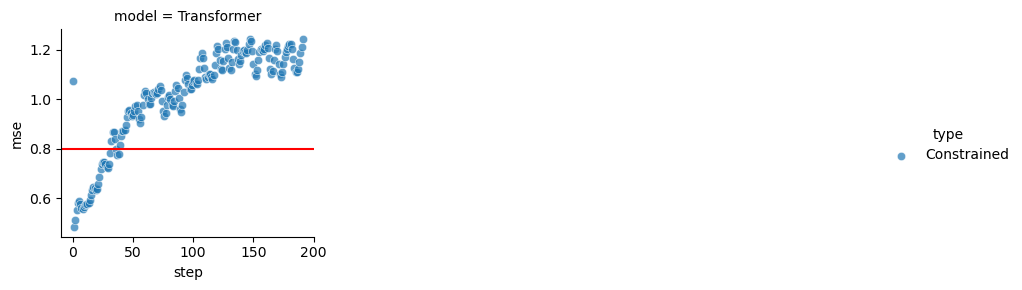

### Dataset: exchange_rate.csv pred_len: 192 constraint_level: 1.103

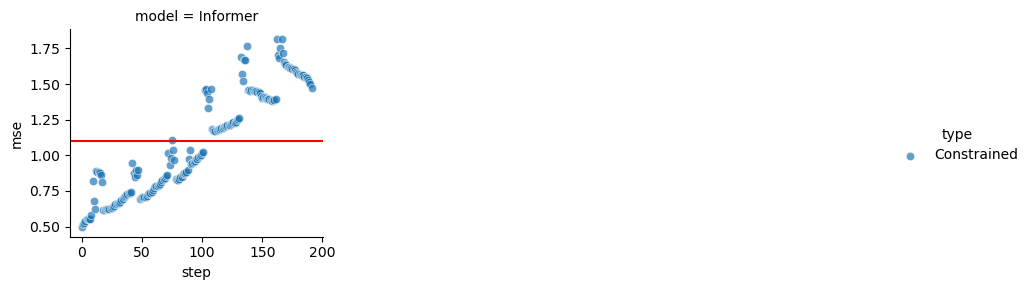

### Dataset: exchange_rate.csv pred_len: 192 constraint_level: 2.067

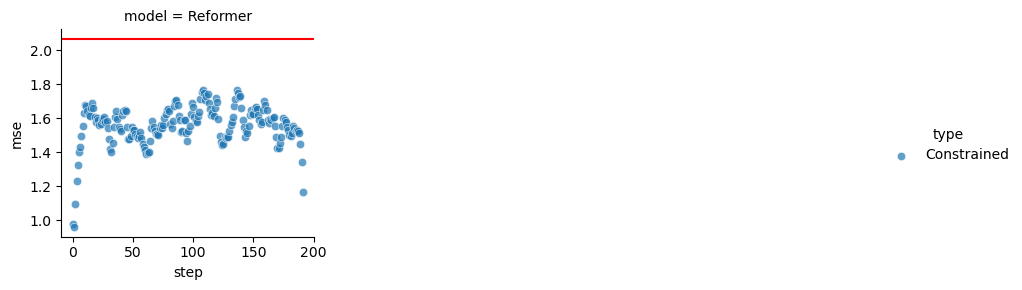

### Dataset: exchange_rate.csv pred_len: 192 constraint_level: 0.742

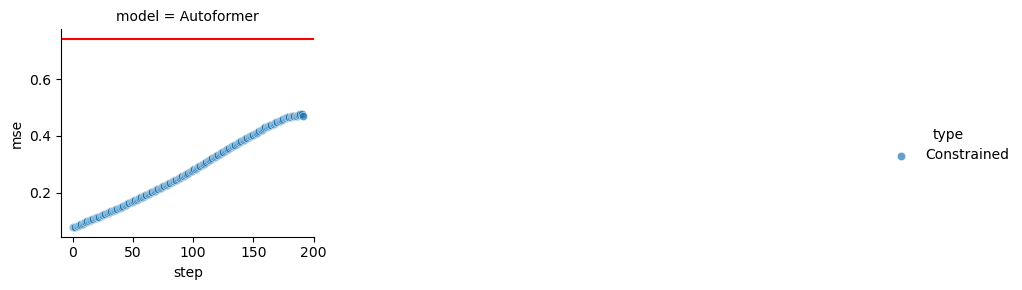

[ 1.183  2.337  4.134  0.83  -1.   ]


### Dataset: exchange_rate.csv pred_len: 336 constraint_level: 1.183

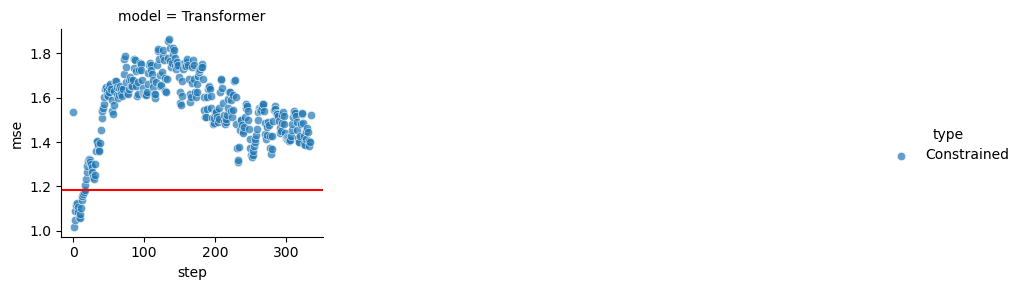

### Dataset: exchange_rate.csv pred_len: 336 constraint_level: 2.337

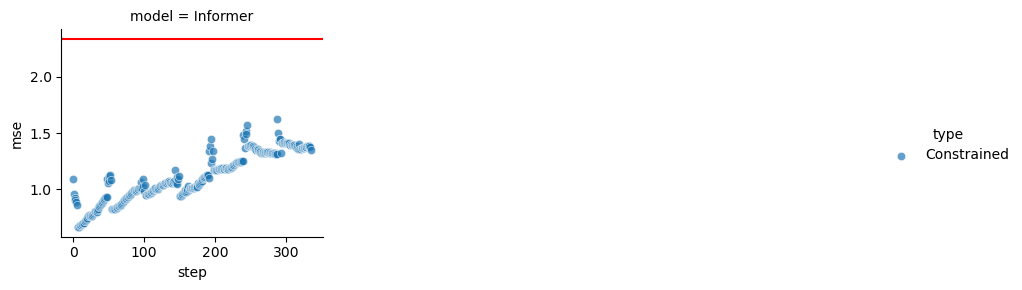

### Dataset: exchange_rate.csv pred_len: 336 constraint_level: 4.134

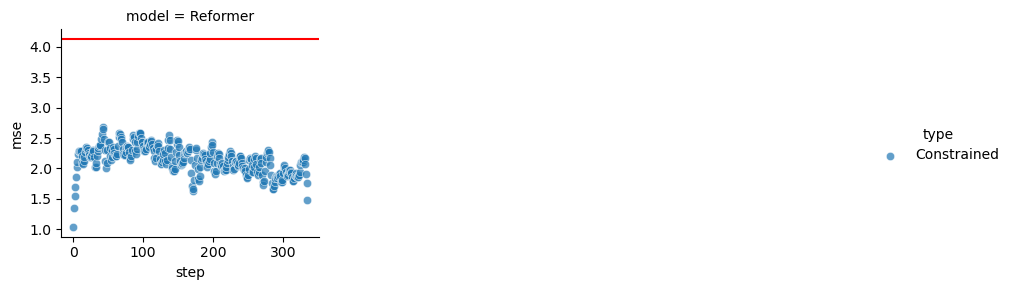

### Dataset: exchange_rate.csv pred_len: 336 constraint_level: 0.83

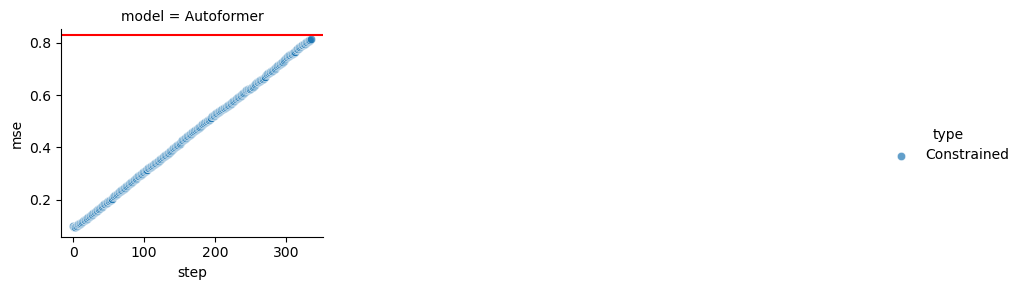

[ 2.496  4.829  4.638  1.047 -1.   ]


### Dataset: exchange_rate.csv pred_len: 720 constraint_level: 2.496

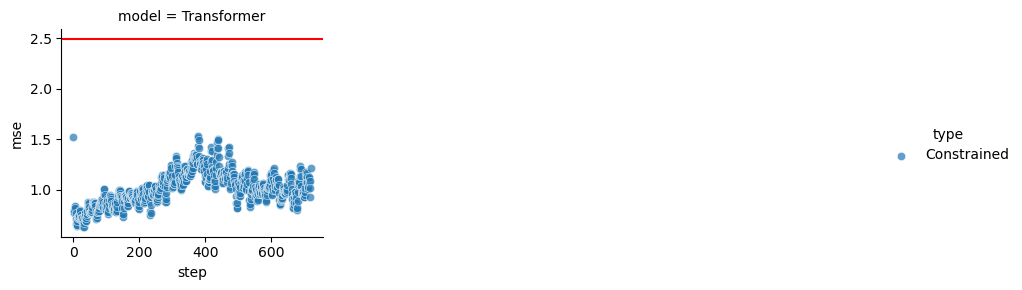

### Dataset: exchange_rate.csv pred_len: 720 constraint_level: 4.829

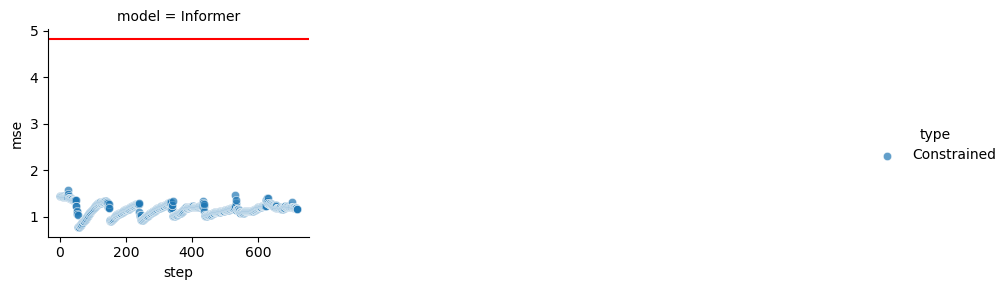

### Dataset: exchange_rate.csv pred_len: 720 constraint_level: 4.638

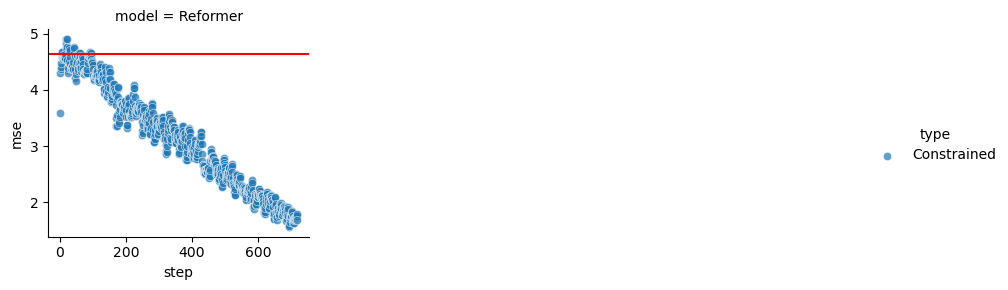

### Dataset: exchange_rate.csv pred_len: 720 constraint_level: 1.047

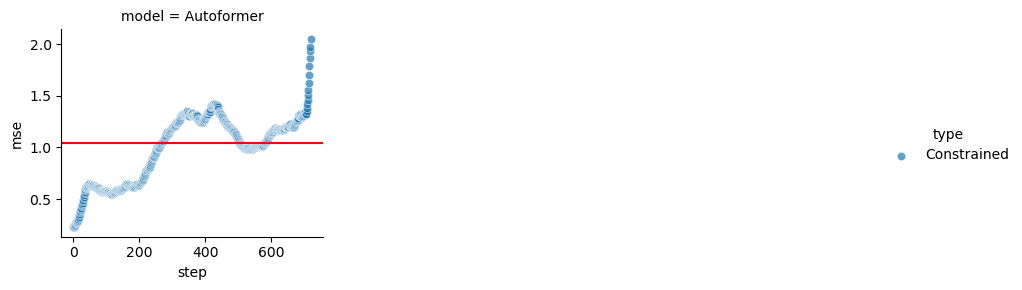

[ 0.538  0.527  0.541 -1.   ]


### Dataset: weather.csv pred_len: 96 constraint_level: 0.538

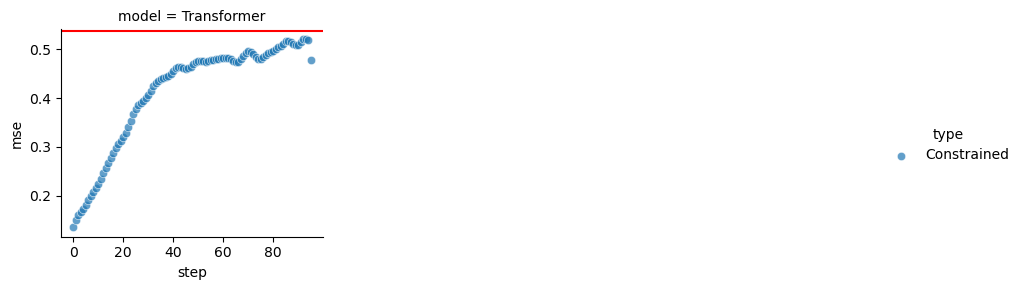

### Dataset: weather.csv pred_len: 96 constraint_level: 0.527

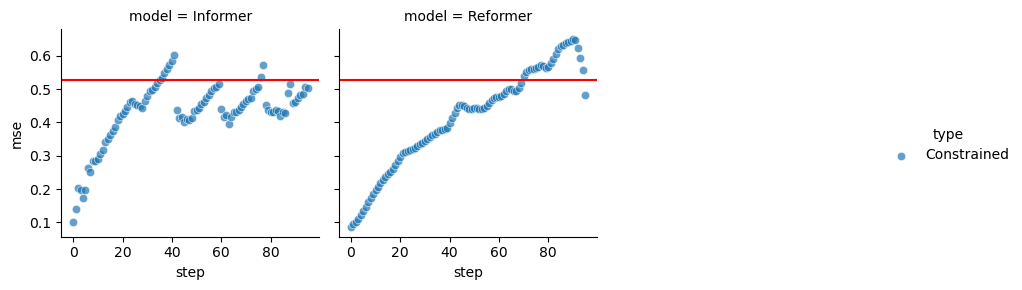

### Dataset: weather.csv pred_len: 96 constraint_level: 0.541

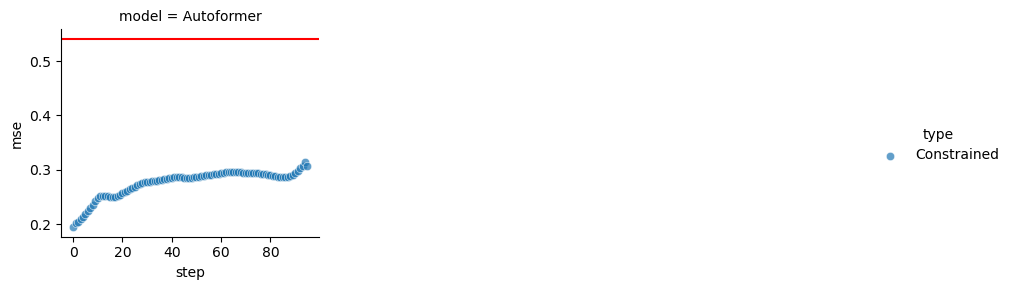

[ 0.662  0.563  0.627  0.58  -1.   ]


### Dataset: weather.csv pred_len: 192 constraint_level: 0.662

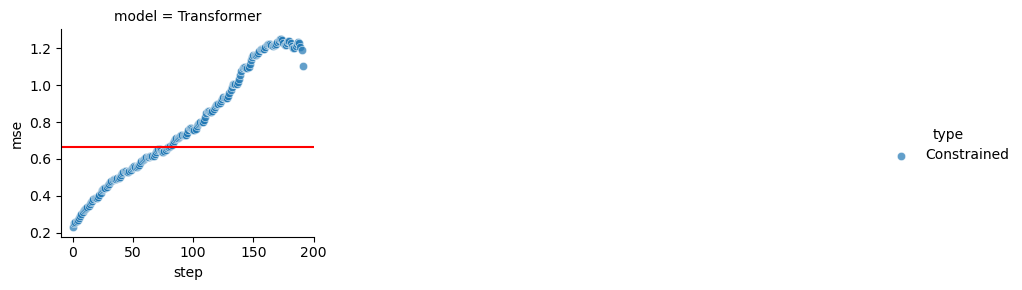

### Dataset: weather.csv pred_len: 192 constraint_level: 0.563

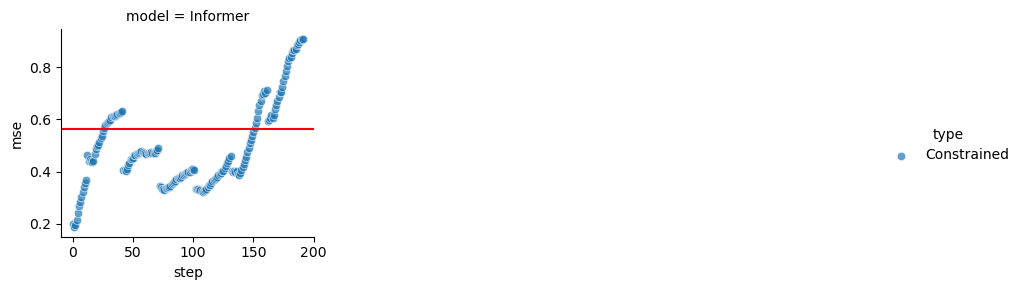

### Dataset: weather.csv pred_len: 192 constraint_level: 0.627

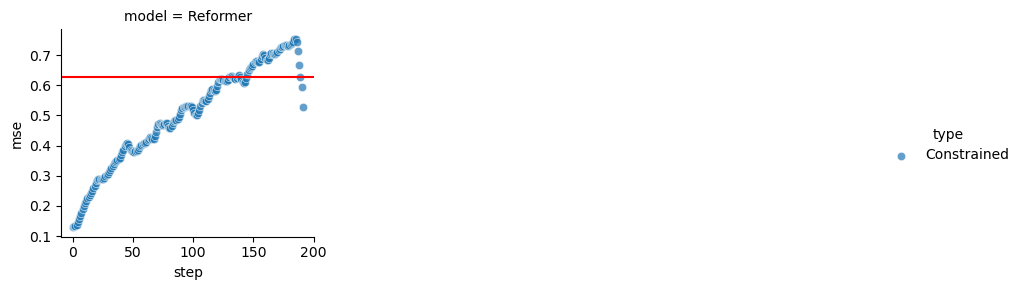

### Dataset: weather.csv pred_len: 192 constraint_level: 0.58

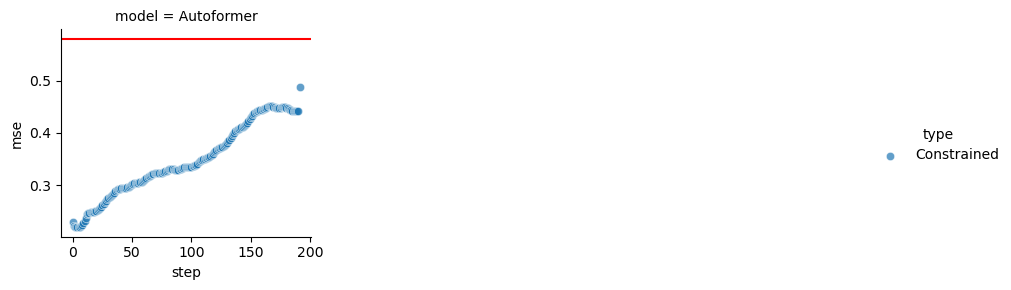

[ 0.772  0.671  0.804  0.679 -1.   ]


### Dataset: weather.csv pred_len: 336 constraint_level: 0.772

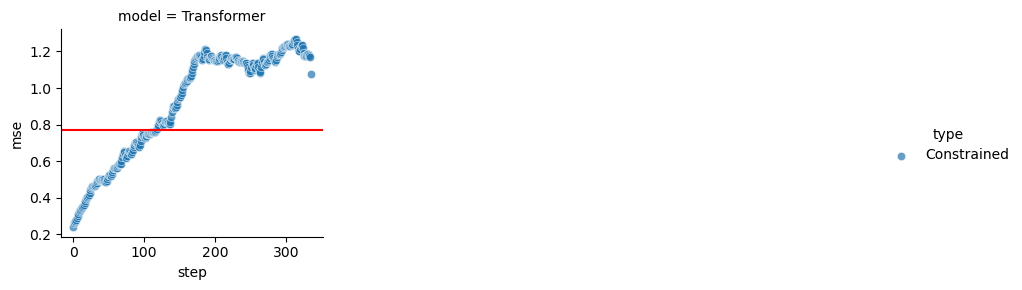

### Dataset: weather.csv pred_len: 336 constraint_level: 0.671

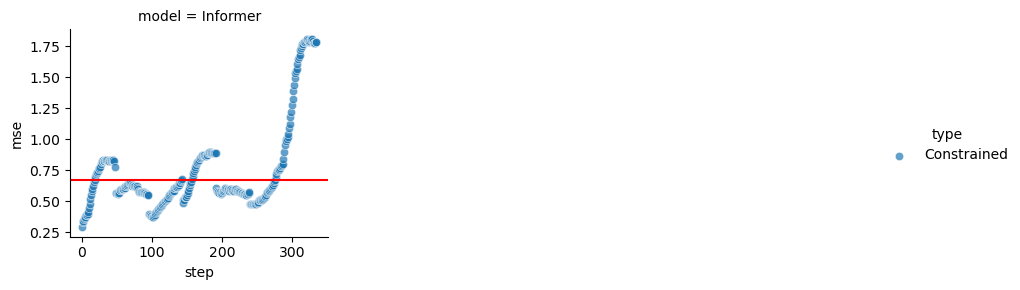

### Dataset: weather.csv pred_len: 336 constraint_level: 0.804

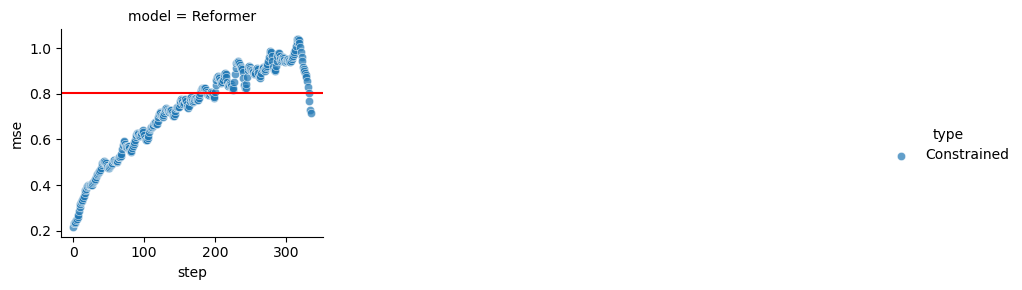

### Dataset: weather.csv pred_len: 336 constraint_level: 0.679

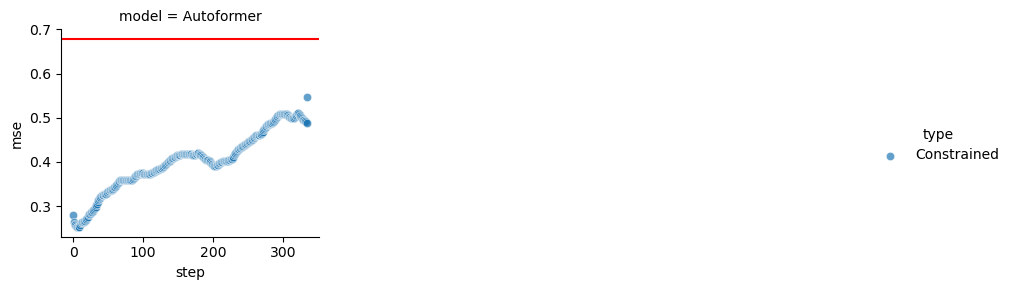

[ 0.972  0.849  0.892  0.862 -1.   ]


### Dataset: weather.csv pred_len: 720 constraint_level: 0.972

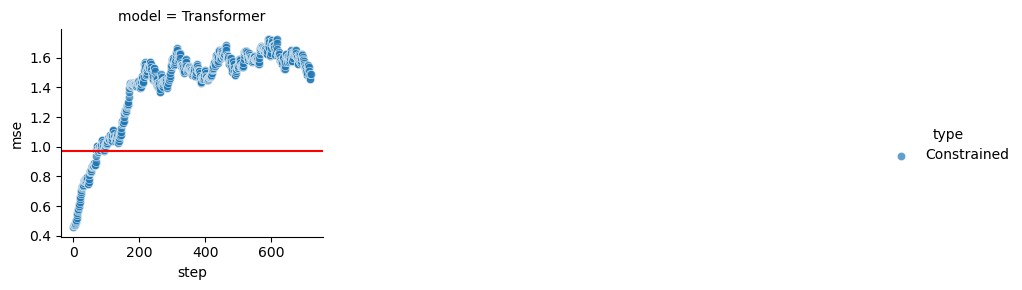

### Dataset: weather.csv pred_len: 720 constraint_level: 0.849

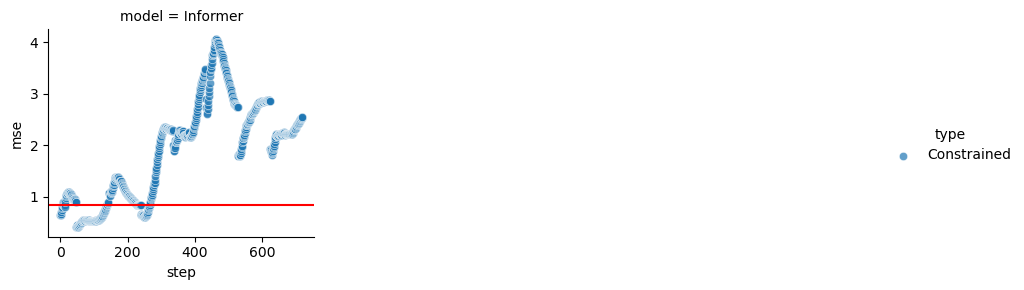

### Dataset: weather.csv pred_len: 720 constraint_level: 0.892

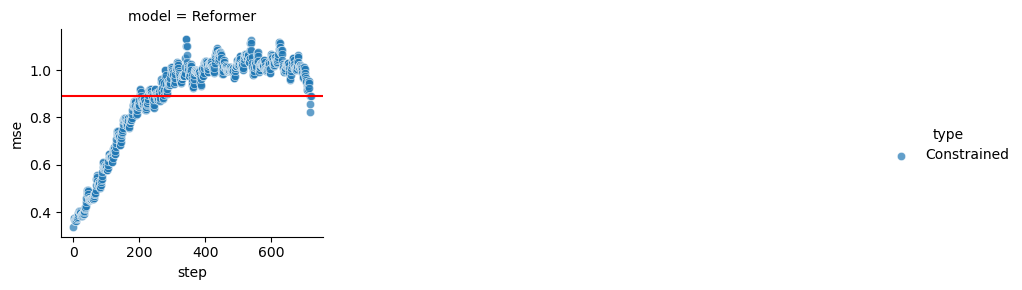

### Dataset: weather.csv pred_len: 720 constraint_level: 0.862

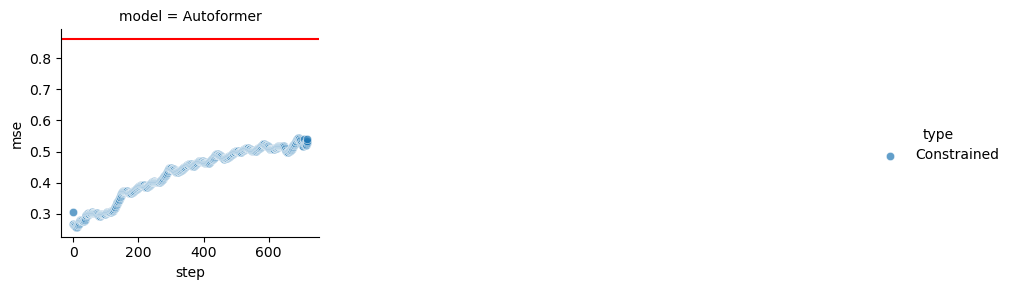

In [43]:
from IPython.display import display, Markdown
to_plot = df_to_plot[(df_to_plot.split=='test')].copy()
for (data_path,pred_len), series in to_plot.groupby(['data_path',"pred_len"]):
    constraints = series.constraint_level.unique()
    print(constraints)
    constraints = constraints[constraints!=-1] # to iterate over all constraints explored.
    for constraint_level in constraints:
        display(Markdown(f"### Dataset: {data_path} pred_len: {pred_len} constraint_level: {constraint_level}"))
        plot_series = series[series["constraint_level"]==constraint_level]
        
        #means_per_experiment = plot_series.groupby(['pred_len','constraint_level','Algorithm','model','epoch','type'])['mse'].mean().reset_index()
        #display(means_per_experiment)
        # do a pivot where model are the rows, and the columns constrained and unconstrained
        #display(means_per_experiment.pivot(index=['model'], columns='type', values='mse').reset_index())

        # sns.scatterplot(x="step", y="mse", hue="Algorithm",style="split", data=plot_series)
        
        # plt.axhline(y=constraint_level, color='r', linestyle='-')
        # plt.title(f"Pred Length: {pred_len}, Constraint_level: {constraint_level}")
        # plt.show()

        # This same scatterplot but in a grid by algorithm. 
        g = sns.FacetGrid(plot_series, col="model", hue="type",col_wrap=3)
        g.map(sns.scatterplot, "step", "mse", alpha=.7) 
        g.add_legend()
        # add the hline
        for ax in g.axes:
            ax.axhline(y=constraint_level, color='r', linestyle='-')
        plt.show()
        # export this plot to latex. Remove the dot in constraint_level decimal
        #TODO fix
        #g.savefig(f"{FIGURES_FOLDER}/constrained_vs_erm_{data_path.replace('.','')}_{pred_len}_{str(constraint_level).replace('.','')}.png")
        # Fix [Errno 2] No such file or directory: 'figures/electricity.csv_96_0.17_individual.png'


### ERM on multiple algorithms
As a front page chart to illustrate the problem

In [ ]:
#TODO ( I think Nacho already did this)

### Loss shaping single instance qualitative analysis

### Plotting dual variables

In [ ]:
df_to_plot[['run_id','pred_len','constraint_level','data_path','model','type']].drop_duplicates().query("data_path=='weather.csv' and model=='Reformer' and type=='Constrained'")

run_id  pred_len  constraint_level    data_path     model  \
68544  p9izzn2r        96             0.556  weather.csv  Reformer   
68832  b1adswkj        96             0.553  weather.csv  Reformer   
69120  dowv2wrc        96             0.516  weather.csv  Reformer   
69408  i7gx5ivx       192             0.665  weather.csv  Reformer   
69984  v4rwuch4       192             0.567  weather.csv  Reformer   
70560  mitm69y2       192             0.553  weather.csv  Reformer   
71136  chbkcq99       336             0.970  weather.csv  Reformer   
72144  749ywu49       336             0.741  weather.csv  Reformer   
73152  fe29o3il       336             0.682  weather.csv  Reformer   
74160  n1dluqy8       720             0.912  weather.csv  Reformer   
76320  ds6fdrqd       720             0.862  weather.csv  Reformer   
78480  f11og493       720             0.698  weather.csv  Reformer   

              type  
68544  Constrained  
68832  Constrained  
69120  Constrained  
69408  Constrained  
69984  Constrained  
70560  Constrained  
71136  Constrained  
72144  Constrained  
73152  Constrained  
74160  Constrained  
76320  Constrained  
78480  Constrained

In [ ]:
constrained_runs = df_to_plot.query('type=="Constrained"').copy()
# Sum the multilpiers, fill with 0
key_cols=['run_id','model','pred_len','constraint_level','data_path']
multiplier_sum=constrained_runs.groupby(key_cols)['multiplier'].sum().reset_index()

#TO DO: plot MSE 
# get test mse
test_mses=constrained_runs.query('split=="test"').groupby(key_cols)['mse'].mean().reset_index()
mult_vs_test_mse=multiplier_sum.merge(test_mses,on=key_cols)
#sns.scatterplot(x="multiplier", y="mse", hue="constraint_level",style="pred_len", data=mult_vs_test_mse)
#g = sns.FacetGrid(mult_vs_test_mse, col="model",row='data_path',style="pred_len")
# scatterplot with hue="constraint_level",style="pred_len"
#g.map(sns.scatterplot, "multiplier", "mse", alpha=.7,)#sns.scatterplot(**args,hue="constraint_level",style="pred_len",alpha=0.3)
#g.map(sns.scatterplot, "multiplier", "mse",alpha=.7)

In [ ]:
# #df_to_plot.query('split=="train" and pred_len==96').run_id.head(1)
# #mult_cols = [f"multiplier/{i}" for i in range(0,96)]
# # Plot for every constraint level in the 96 pred len window
# #for pred_len in df_to_plot.pred_len.unique():
# display(Markdown(f"# Multipliers for window of {pred_len}"))
# # sns.scatterplot(x="step", y="multiplier", hue="model",style="constraint_level", 
# #     data=df_to_plot.query(f"split=='train' and type=='Constrained' and pred_len=={96} and data_path=='weather.csv'"))
# # same plot, but grid with one plot per model
# dd = df_to_plot#df_to_plot.query("run_id=='6fgam2dx' and split=='train'")#.query(f"split=='train' and type=='Constrained' and pred_len==96 and data_path=='electricity.csv' and model=='Reformer' and constraint_level==0.157")
# dd_test = df_to_plot#df_to_plot.query("run_id=='6fgam2dx' and split=='test'")#.query(f"split=='test' and type=='Constrained' and pred_len==96 and data_path=='electricity.csv' and model=='Reformer' and constraint_level==0.157")

# #print(dd_test.constraint_level.unique())
# test_set_plus_multipliers = dd[['step','multiplier']].merge(dd_test[['step','split','mse']],on='step')

# unioned = pd.concat([dd[['step','split','multiplier','mse']],test_set_plus_multipliers[['step','split','multiplier','mse']]])

# display(unioned)


# display(test_set_plus_multipliers)

# #constraint_level==0.553
# # mult on x, mse@train and mse@test on y. hue=split
# # Add step over every point
# sns.scatterplot(unioned,x="multiplier", y="mse",hue='split', alpha=.3,legend='full')



# g = sns.FacetGrid(dd, col="model", row="constraint_level")
# g.map(sns.scatterplot, "step", "multiplier", alpha=.3)
# #g.map(sns.scatterplot, "step", "mse", alpha=.3)

# Multipliers for window of 720

step  split  multiplier       mse
16128        0  train    2.801533  0.209369
16129        1  train    1.050123  0.204042
16130        2  train    0.269966  0.194581
16131        3  train    0.000000  0.189056
16132        4  train    0.000000  0.187635
...        ...    ...         ...       ...
17418235   719   test         NaN  1.910884
17418236   719   test         NaN  1.910884
17418237   719    val         NaN  1.909591
17418238   719    val         NaN  1.909591
17418239   719    val         NaN  1.909591

[17515008 rows x 4 columns]

step  multiplier  split       mse
0            0    2.801533  train  0.209369
1            0    2.801533   test  0.268508
2            0    2.801533    val  0.266284
3            0    2.801533  train  0.215619
4            0    2.801533   test  0.247226
...        ...         ...    ...       ...
17418235   719         NaN   test  1.910884
17418236   719         NaN   test  1.910884
17418237   719         NaN    val  1.909591
17418238   719         NaN    val  1.909591
17418239   719         NaN    val  1.909591

[17418240 rows x 4 columns]

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fedbc19fa70> (for post_execute):


KeyboardInterrupt: 

/home/jporras/miniconda3/envs/autoformer/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Error in callback <function flush_figures at 0x7fedbc19f4d0> (for post_execute):


KeyboardInterrupt: 

### More random explorations
Ideas: 
1. Loss over time
2. Infeasibility rate over time
3. Loss shape across epochs (see how it evolves)
4. Plotting dual variables

## Result tables
1. Reproduce the pivot table from notebook 11, perhaps add standard deviation reports.
2. Explore and find other interesting table visualziation

### Pivot tables (summary)

In [19]:
#Note, variance is nan because there is only one run per parameter set
weather = summary_metrics.query('data_path=="weather.csv"').copy()
electricity = summary_metrics.query('data_path=="electricity.csv"').copy()
for name,dataset in [('weather',weather), ('electricity',electricity)]:
    display(Markdown(f"# {name}"))
    tp2=dataset.copy(deep=True)
    #tp2=weather.query('split=="test"').copy()
    # Compute 'infeasible amount' as the difference between the mse and the constraint_level, 0 if mse < constraint
    #tp2['mean_violation']=tp2.apply(lambda x: max(0,x['mse']-x['constraint_level']),axis=1)
    
    # Split into constrained and ERM
    tp2_constrained=tp2.query('type=="Constrained"').copy()
    tp2_erm_baseline=tp2.query('type=="ERM"').copy()

    distinct_constraints = tp2_constrained[['pred_len','model','constraint_level']].drop_duplicates()

    # crossjoin the ERM mse to all constraint levels
    #tp2_erm_baseline_broadcasted = tp2_erm_baseline.drop(columns=['constraint_level']).merge(distinct_constraints,on=['pred_len','model'],how='left')

    #display(tp2_erm_baseline_broadcasted[['type','model','constraint_level','mse']].head())

    # concat back together to compute mean_violation
    #tp2=pd.concat([tp2_constrained,tp2_erm_baseline_broadcasted],axis=0)

    #tp2['mean_violation']=tp2.apply(lambda x: max(0,x['mse']-x['constraint_level']),axis=1)

    # Sanity check show the mean_violation for the ERM runs
    #display(tp2.query('type=="ERM"')[['type','model','constraint_level','mse','mean_violation']].head())


    #GROUPING TEH VALS
    grouped_values=tp2.groupby(['pred_len','constraint_level','model','type'])[[
        'mse','mcv',
        'std_mse','std_mcv',
        'mean_infeasible_rate','std_infeasible_rate']].mean().reset_index()
    #grouped_constrained = grouped_values[grouped_values.type=='Constrained'].copy()
    #grouped_erm_baseline=grouped_values[grouped_values.type=='ERM'].copy()

    # best_constraints is the constraint for each model and pred_len that minimizes mean_violation. show min and argmin
    #best_constraints_per_window = grouped_values.query('type=="Constrained"').groupby(['pred_len']).apply(lambda x: x.loc[x['mean_violation'].idxmin()]).reset_index(drop=True)[['pred_len','type','constraint_level','mean_violation','mse']]
    # instead of best constraints, show all constraint levels.

    # join best_constraints and grouped_values to get the mse and mean_violation for the best constraint
    #best_constrained=grouped_values.merge(best_constraints_per_window[['pred_len','constraint_level']],on=['pred_len','constraint_level'],how='inner')


    # crossjoin the ERM mse to all constraint levels
    ##grouped_erm_baseline_broadcasted = grouped_erm_baseline.drop(columns=['constraint_level']).merge(grouped_constrained[['pred_len','model','constraint_level']].drop_duplicates(),on=['pred_len','model'],how='left')

    # Pivot of models versus constrained and ERM, values are mse and mse_diff
    all_results = grouped_values#pd.concat([grouped_constrained,grouped_erm_baseline_broadcasted],axis=0)
    # Pivot all results, sort ascending by pred_len, then mean_violation on constrained

    pivoted=all_results.pivot(
        index=['pred_len','constraint_level'], 
        columns=['type','model'], 
        values=['mse','std_mse','mcv','std_mcv','mean_infeasible_rate','std_infeasible_rate']
    ).query('constraint_level>0').round(4)
    simplified = all_results.pivot(
        index=['pred_len','constraint_level'],
        columns=['type','model'],
        values=['mse','mcv']
    )
    pd.set_option('display.max_columns', None)
    print("SIMPLIFIED 192 MSE")
    # show all pred lengths (index)
    for pred_len in [96, 192, 336, 720]:            
        print(simplified.index.get_level_values(0).unique())
        simp_mse_192=simplified[simplified.index.get_level_values(0)==pred_len][['mse']]
        sim_mcv_192=simplified[simplified.index.get_level_values(0)==pred_len][['mcv']]

        # Flatten the multiindex
        def prettify(d):
            d = d.copy()
            d.columns = d.columns.map('_'.join)
            return d.style.format(precision=3)
        # display(prettify(simp_mse_192))
        print(f"SIMPLIFIED {pred_len} MCV")
        display(prettify(sim_mcv_192))
    print("FULL")
    display(pivoted)
    #reformer works best on weather.

# weather

SIMPLIFIED 192 MSE
Int64Index([96, 192, 336, 720], dtype='int64', name='pred_len')
SIMPLIFIED 96 MCV


Int64Index([96, 192, 336, 720], dtype='int64', name='pred_len')
SIMPLIFIED 192 MCV


Int64Index([96, 192, 336, 720], dtype='int64', name='pred_len')
SIMPLIFIED 336 MCV


Int64Index([96, 192, 336, 720], dtype='int64', name='pred_len')
SIMPLIFIED 720 MCV


FULL


mse                                   \
type                      Constrained         ERM Constrained      ERM   
model                     Transformer Transformer    Informer Informer   
pred_len constraint_level                                                
96       0.467                 0.3932      0.3776         NaN      NaN   
         0.475                    NaN         NaN      0.3998   0.3836   
         0.484                    NaN         NaN         NaN      NaN   
         0.527                    NaN         NaN      0.4074   0.3836   
         0.538                 0.3869      0.3776         NaN      NaN   
         0.548                    NaN         NaN      0.3992   0.3836   
         0.549                    NaN         NaN         NaN      NaN   
         0.565                    NaN         NaN         NaN      NaN   
         0.585                 0.3870      0.3776         NaN      NaN   
192      0.525                    NaN         NaN      0.4409   0.4364   
         0.559                 0.5479      0.5017         NaN      NaN   
         0.563                    NaN         NaN      0.4270   0.4364   
         0.580                    NaN         NaN         NaN      NaN   
         0.598                    NaN         NaN         NaN      NaN   
         0.607                    NaN         NaN      0.4409   0.4364   
         0.627                    NaN         NaN         NaN      NaN   
         0.662                 0.5888      0.5017         NaN      NaN   
         0.667                    NaN         NaN         NaN      NaN   
         0.771                 0.5986      0.5017         NaN      NaN   
336      0.577                    NaN         NaN      0.5294   0.4980   
         0.610                    NaN         NaN         NaN      NaN   
         0.622                 0.6319      0.5636         NaN      NaN   
         0.671                    NaN         NaN      0.5439   0.4980   
         0.679                    NaN         NaN         NaN      NaN   
         0.729                    NaN         NaN      0.5609   0.4980   
         0.730                    NaN         NaN         NaN      NaN   
         0.772                 0.6517      0.5636         NaN      NaN   
         0.804                    NaN         NaN         NaN      NaN   
         0.835                    NaN         NaN         NaN      NaN   
         0.869                 0.6517      0.5636         NaN      NaN   
720      0.747                    NaN         NaN      1.0187   0.7342   
         0.787                 0.8727      0.7018         NaN      NaN   
         0.849                    NaN         NaN      1.0665   0.7342   
         0.877                    NaN         NaN         NaN      NaN   
         0.892                    NaN         NaN         NaN      NaN   
         0.905                    NaN         NaN         NaN      NaN   
         0.972                 0.8927      0.7018         NaN      NaN   
         0.980                    NaN         NaN      1.0985   0.7342   
         1.035                 0.8925      0.7018         NaN      NaN   

                                                                       \
type                      Constrained        ERM Constrained      ERM   
model                      Autoformer Autoformer    Reformer Reformer   
pred_len constraint_level                                               
96       0.467                    NaN        NaN         NaN      NaN   
         0.475                    NaN        NaN         NaN      NaN   
         0.484                 0.4088     0.4086         NaN      NaN   
         0.527                    NaN        NaN      0.3965   0.4053   
         0.538                    NaN        NaN         NaN      NaN   
         0.548                    NaN        NaN         NaN      NaN   
         0.549                 0.4010     0.4086         NaN      NaN   
         0.565                    NaN        NaN

# electricity

SIMPLIFIED 192 MSE
Int64Index([96, 192, 336, 720], dtype='int64', name='pred_len')
SIMPLIFIED 96 MCV


Int64Index([96, 192, 336, 720], dtype='int64', name='pred_len')
SIMPLIFIED 192 MCV


Int64Index([96, 192, 336, 720], dtype='int64', name='pred_len')
SIMPLIFIED 336 MCV


Int64Index([96, 192, 336, 720], dtype='int64', name='pred_len')
SIMPLIFIED 720 MCV


FULL


mse                                     \
type                      Constrained        ERM Constrained         ERM   
model                      Autoformer Autoformer Transformer Transformer   
pred_len constraint_level                                                  
96       0.151                 0.1607     0.1618         NaN         NaN   
         0.160                 0.1639     0.1618         NaN         NaN   
         0.166                 0.1646     0.1618         NaN         NaN   
         0.176                    NaN        NaN      0.1866      0.1852   
         0.181                    NaN        NaN      0.1870      0.1852   
         0.189                    NaN        NaN      0.1879      0.1852   
         0.198                    NaN        NaN         NaN         NaN   
         0.202                    NaN        NaN         NaN         NaN   
         0.207                    NaN        NaN         NaN         NaN   
         0.224                    NaN        NaN         NaN         NaN   
         0.226                    NaN        NaN         NaN         NaN   
         0.232                    NaN        NaN         NaN         NaN   
192      0.174                 0.1857     0.1797         NaN         NaN   
         0.184                 0.1917     0.1797         NaN         NaN   
         0.197                    NaN        NaN      0.2029      0.2020   
         0.202                 0.1880     0.1797         NaN         NaN   
         0.211                    NaN        NaN      0.2026      0.2020   
         0.218                    NaN        NaN         NaN         NaN   
         0.226                    NaN        NaN         NaN         NaN   
         0.227                    NaN        NaN      0.2090      0.2020   
         0.237                    NaN        NaN         NaN         NaN   
         0.238                    NaN        NaN         NaN         NaN   
         0.254                    NaN        NaN         NaN         NaN   
         0.257                    NaN        NaN         NaN         NaN   
336      0.194                    NaN        NaN      0.2105      0.2093   
         0.197                 0.1954     0.2352         NaN         NaN   
         0.207                 0.1992     0.2352         NaN         NaN   
         0.211                    NaN        NaN      0.2146      0.2093   
         0.223                    NaN        NaN         NaN         NaN   
         0.234                    NaN        NaN      0.2171      0.2093   
         0.236                    NaN        NaN         NaN         NaN   
         0.240                 0.1981     0.2352         NaN         NaN   
         0.250                    NaN        NaN         NaN         NaN   
         0.254                    NaN        NaN         NaN         NaN   
         0.263                    NaN        NaN         NaN         NaN   
         0.296                    NaN        NaN         NaN         NaN   
720      0.218                 0.2910     0.2171         NaN         NaN   
         0.228                 0.2663     0.2171         NaN         NaN   
         0.232                    NaN        NaN      0.2332      0.2255   
         0.239                    NaN        NaN      0.2346      0.2255   
         0.244                 0.2521     0.2171         NaN         NaN   
         0.250                    NaN        NaN      0.2368      0.2255   
         0.251                    NaN        NaN         NaN         NaN   
         0.254                    NaN        NaN         NaN         NaN   
         0.255                    NaN        NaN         NaN         NaN   
         0.309                    NaN        NaN         NaN         NaN   
         0.321                    NaN        NaN         NaN         NaN   
         0.352                    NaN        NaN         NaN         NaN   

                                                                     \
type      

### Comparing variance and CoV ERM vs constrained

In [21]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 288 to 815
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Algorithm             240 non-null    object 
 1   model                 240 non-null    object 
 2   type                  240 non-null    object 
 3   constraint_level      240 non-null    float64
 4   pred_len              240 non-null    int64  
 5   data_path             240 non-null    object 
 6   split                 240 non-null    object 
 7   mse                   240 non-null    float64
 8   std_mse               0 non-null      float64
 9   mcv                   240 non-null    float64
 10  std_mcv               0 non-null      float64
 11  mean_infeasible_rate  240 non-null    float64
 12  std_infeasible_rate   0 non-null      float64
 13  run_count             240 non-null    float64
dtypes: float64(8), int64(1), object(5)
memory usage: 28.1+ KB


In [50]:
df_to_plot.query("split=='test'").constraint_idx.unique()

array([3, 2, 1, 0])

In [59]:
# Calculate mean and std for mse and constraint_violation. Rename them mean_{metric} and std_{metric
#ToDO filter one seeed and split
stepwise_metrics = df_to_plot[df_to_plot.constraint_idx.isin([0,2])].query("split=='test'").groupby([
    "run_id",
    "Algorithm", #Harmless carryover col for legacy purposes (verified the counts are the same)
    "model",'type',
    "constraint_level",
    "constraint_idx",
    "pred_len",
    "data_path",
    "split",
    'step'#STEPWISE
    ])['mse','constraint_violation','infeasible_rate','run_id'].aggregate(
        mse=('mse','mean'),
        #std_mse=('mse','std'),
        mcv=('constraint_violation','mean'),
        #std_mcv=('constraint_violation','std'),
        mean_infeasible_rate=('infeasible_rate','mean'),
        #std_infeasible_rate=('infeasible_rate','std'),
        run_count=('run_id','nunique')
        ).reset_index().round(5)
summary_stepwise=stepwise_metrics.groupby([
    "run_id",
    "Algorithm", #Harmless carryover col for legacy purposes (verified the counts are the same)
    "model",
    'type',
    "constraint_level",
    "constraint_idx",
    "pred_len",
    "data_path",
    "split"]).aggregate(
        mse=('mse','mean'),
        std_mse=('mse','std'),
        mcv=('mcv','mean'),
        std_mcv=('mcv','std'),
        mean_infeasible_rate=('mean_infeasible_rate','mean'),
        std_infeasible_rate=('mean_infeasible_rate','std'),
        run_count=('run_count','mean'),
        step_count=('step','count')
    ).reset_index()
summary_stepwise

/home/jporras/miniconda3/envs/autoformer/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]


run_id                             Algorithm        model         type  \
0    02zvd69l             exchange_rate Transformer  Transformer  Constrained   
1    07srnmcx              exchange_rate Autoformer   Autoformer  Constrained   
2    092u33lj    AllModels_electricity.csv Reformer     Reformer          ERM   
3    092u33lj    AllModels_electricity.csv Reformer     Reformer          ERM   
4    092u33lj    AllModels_electricity.csv Reformer     Reformer          ERM   
..        ...                                   ...          ...          ...   
177  yhsan1ax        AllModels_weather.csv Informer     Informer          ERM   
178  z46h4r20                electricity Autoformer   Autoformer  Constrained   
179  zuqz5thy  AllModels_exchange_rate.csv Reformer     Reformer          ERM   
180  zuqz5thy  AllModels_exchange_rate.csv Reformer     Reformer          ERM   
181  zuqz5thy  AllModels_exchange_rate.csv Reformer     Reformer          ERM   

     constraint_level  constraint_idx  pred_len          data_path split  \
0               0.798               2       192  exchange_rate.csv  test   
1               1.047               2       720  exchange_rate.csv  test   
2               0.198               0        96    electricity.csv  test   
3               0.202               0        96    electricity.csv  test   
4               0.207               0        96    electricity.csv  test   
..                ...             ...       ...                ...   ...   
177             0.607               0       192        weather.csv  test   
178             0.228               2       720    electricity.csv  test   
179             1.137               0        96  exchange_rate.csv  test   
180             1.221               0        96  exchange_rate.csv  test   
181             1.495               0        96  exchange_rate.csv  test   

          mse   std_mse       mcv   std_mcv  mean_infeasible_rate  \
0    1.078070  0.283924  0.317347  0.222823               0.78976   
1    0.982165  0.129014  0.024493  0.065788               0.32604   
2    0.298882  0.010611  0.100882  0.010611               1.00000   
3    0.298882  0.010611  0.096882  0.010611               1.00000   
4    0.298882  0.010611  0.091882  0.010611               1.00000   
..        ...       ...       ...       ...                   ...   
177  0.514648  0.158067  0.034075  0.077200               1.00000   
178  0.375928  0.253698  0.147928  0.253698               0.95283   
179  0.960433  0.115636  0.001075  0.005120               1.00000   
180  0.960433  0.115636  0.000000  0.000000               1.00000   
181  0.960433  0.115636  0.000000  0.000000               1.00000   

     std_infeasible_rate  run_count  step_count  
0                    0.0        1.0         192  
1                    0.0        1.0         720  
2                    0.0        1.0          96  
3                    0.0        1.0          96  
4                    0.0        1.0          96  
..                   ...        ...         ...  
177                  0.0        1.0         192  
178                  0.0        1.0         720  
179                  0.0        1.0          96  
180                  0.0        1.0          96  
181                  0.0        1.0          96  

[182 rows x 17 columns]

In [105]:
summary_stepwise.groupby(['run_id','type','constraint_idx',"Algorithm","model"]).size().reset_index()

run_id         type  constraint_idx  \
0   02zvd69l  Constrained               2   
1   07srnmcx  Constrained               2   
2   092u33lj          ERM               0   
3   0roswz2a          ERM               0   
4   0uvkl0hn  Constrained               2   
..       ...          ...             ...   
88  xyee0xef  Constrained               2   
89  y7ygu53t  Constrained               2   
90  yhsan1ax          ERM               0   
91  z46h4r20  Constrained               2   
92  zuqz5thy          ERM               0   

                               Algorithm        model  0  
0              exchange_rate Transformer  Transformer  1  
1               exchange_rate Autoformer   Autoformer  1  
2     AllModels_electricity.csv Reformer     Reformer  3  
3   AllModels_electricity.csv Autoformer   Autoformer  3  
4                 exchange_rate Reformer     Reformer  1  
..                                   ...          ... ..  
88                      weather Informer     Informer  1  
89              exchange_rate Autoformer   Autoformer  1  
90        AllModels_weather.csv Informer     Informer  3  
91                electricity Autoformer   Autoformer  1  
92  AllModels_exchange_rate.csv Reformer     Reformer  3  

[93 rows x 6 columns]

In [104]:
dd_weather = summary_stepwise.query('data_path=="weather.csv" and pred_len==96').copy()
dd_weather.groupby(['run_id','constraint_idx',"Algorithm","model","constraint_idx"])
#dd_weather.pivot(index=['run_id','constraint_idx',"Algorithm","model","constraint_idx"], columns='type', values='mse')

#### Pivot tables stepwise

In [53]:
#Note, variance is nan because there is only one run per parameter set
weather = summary_stepwise.query('data_path=="weather.csv"').copy()
electricity = summary_stepwise.query('data_path=="electricity.csv"').copy()
for name,dataset in [('weather',weather), ('electricity',electricity)]:
    display(Markdown(f"# {name}"))
    tp2=dataset.copy(deep=True)
    #tp2=weather.query('split=="test"').copy()
    # Compute 'infeasible amount' as the difference between the mse and the constraint_level, 0 if mse < constraint
    #tp2['mean_violation']=tp2.apply(lambda x: max(0,x['mse']-x['constraint_level']),axis=1)
    
    # Split into constrained and ERM
    tp2_constrained=tp2.query('type=="Constrained"').copy()
    tp2_erm_baseline=tp2.query('type=="ERM"').copy()

    distinct_constraints = tp2_constrained[['pred_len','model','constraint_level']].drop_duplicates()

    # crossjoin the ERM mse to all constraint levels
    #tp2_erm_baseline_broadcasted = tp2_erm_baseline.drop(columns=['constraint_level']).merge(distinct_constraints,on=['pred_len','model'],how='left')

    #display(tp2_erm_baseline_broadcasted[['type','model','constraint_level','mse']].head())

    # concat back together to compute mean_violation
    #tp2=pd.concat([tp2_constrained,tp2_erm_baseline_broadcasted],axis=0)

    #tp2['mean_violation']=tp2.apply(lambda x: max(0,x['mse']-x['constraint_level']),axis=1)

    # Sanity check show the mean_violation for the ERM runs
    #display(tp2.query('type=="ERM"')[['type','model','constraint_level','mse','mean_violation']].head())


    #GROUPING TEH VALS
    grouped_values=tp2.groupby(['pred_len','constraint_level','constraint_idx','model','type'])[[
        'mse','mcv',
        'std_mse','std_mcv',
        'mean_infeasible_rate','std_infeasible_rate']].mean().reset_index()
    #grouped_constrained = grouped_values[grouped_values.type=='Constrained'].copy()
    #grouped_erm_baseline=grouped_values[grouped_values.type=='ERM'].copy()

    # best_constraints is the constraint for each model and pred_len that minimizes mean_violation. show min and argmin
    #best_constraints_per_window = grouped_values.query('type=="Constrained"').groupby(['pred_len']).apply(lambda x: x.loc[x['mean_violation'].idxmin()]).reset_index(drop=True)[['pred_len','type','constraint_level','mean_violation','mse']]
    # instead of best constraints, show all constraint levels.

    # join best_constraints and grouped_values to get the mse and mean_violation for the best constraint
    #best_constrained=grouped_values.merge(best_constraints_per_window[['pred_len','constraint_level']],on=['pred_len','constraint_level'],how='inner')


    # crossjoin the ERM mse to all constraint levels
    ##grouped_erm_baseline_broadcasted = grouped_erm_baseline.drop(columns=['constraint_level']).merge(grouped_constrained[['pred_len','model','constraint_level']].drop_duplicates(),on=['pred_len','model'],how='left')

    # Pivot of models versus constrained and ERM, values are mse and mse_diff
    all_results = grouped_values#pd.concat([grouped_constrained,grouped_erm_baseline_broadcasted],axis=0)
    # Pivot all results, sort ascending by pred_len, then mean_violation on constrained

    pivoted=all_results.pivot(
        index=['pred_len','constraint_idx'], 
        columns=['type','model'],
        values=['mse','std_mse','mcv','std_mcv','mean_infeasible_rate','std_infeasible_rate']
    ).query('constraint_level>0').round(4)
    simplified = all_results.pivot(
        index=['pred_len','constraint_level'],
        columns=['type','model'],
        values=['mse','mcv']
    )
    pd.set_option('display.max_columns', None)
    print("SIMPLIFIED 192 MSE")
    # show all pred lengths (index)
    for pred_len in [96, 192, 336, 720]:    
        print(simplified.index.get_level_values(0).unique())
        simp_mse_192=simplified[simplified.index.get_level_values(0)==pred_len][['mse']]
        sim_mcv_192=simplified[simplified.index.get_level_values(0)==pred_len][['mcv']]

        # Flatten the multiindex
        def prettify(d):
            d = d.copy()
            d.columns = d.columns.map('_'.join)
            return d.style.format(precision=3)
        # display(prettify(simp_mse_192))
        print(f"SIMPLIFIED {pred_len} MCV")
        display(prettify(sim_mcv_192))
    print("FULL")
    display(pivoted)
    #reformer works best on weather.

# weather

ValueError: Index contains duplicate entries, cannot reshape

## Pivots per dataset